# Sommaire

* [Chapitre 1 : Prédiction d'un modèle pour la consommation d'énergie avec données numériques](#chapter1)
    * [Importation des données](#section_1_1)
    * [Standardisation des données](#section_1_2)
    * [Régressions linéaire](#section_1_3)
        * [Régression Dummy](#section_1_3_1)
        * [Régressions linéaire et polynomiale](#section_1_3_2)
        * [Régressions ElasticNet](#section_1_3_3)
    * [Régressions ensemblistes](#section_1_4)
        * [Régression RandomForest](#section_1_4_1)
        * [Régression AdaBoost](#section_1_4_2)
        * [Régression Gradient Boosting](#section_1_4_3)
    * [Régression KNN](#section_1_5)
    * [Régression SVR](#section_1_6)

* [Chapitre 2 : Ajout des composantes catégorielles](#chapter2)
    * [Encodage des données](#section_2_1)
    * [Régressions linéaires](#section_2_2)
        * [Régression Dummy](#section_2_2_1)
        * [Régression linéaire et polynomiale](#section_2_2_2)
        * [Régression ElasticNet](#section_2_2_3)
    * [Régressions ensemblistes](#section_2_3)
        * [Régression RandomForest](#section_2_3_1)
        * [Régression AdaBoost](#section_2_3_2)
        * [Régression Gradient Boosting](#section_2_3_3)
    * [Régression KNN](#section_2_4)
    * [Régression SVR](#section_2_5)
    * [Bilan](#section_2_6)
* [Chapitre 3 : Influence de l'ENERGYSTARScore](#chapter3)
    * [Régressions linéaires](#section_3_1)
        * [Régression Dummy](#section_3_1_1)
        * [Régression linéaire et polynomiale](#section_3_1_2)
        * [Régression ElasticNet](#section_3_1_3)
    * [Régressions ensemblistes](#section_3_2)
        * [Régression Random Forest](#section_3_2_1)
        * [Régression AdaBoost](#section_3_2_2)
        * [Régression Gradient Boosting](#section_3_2_3)
    * [Régression KNN](#section_3_3)
    * [Régression SVR](#section_3_4)
    * [Bilan](#section_3_5)
        * [Bilan ENERGYSTARScore](#section_3_5_1)
        * [Bilan de l'étude](#section_3_5_2)
        * [Prédiction de la consommation d'énergie des bâtiments](#section_3_5_3)

<a class="anchor" id="chapter1"></a>
# Chapitre 1 : Prédiction d'un modèle pour la consommation d'énergie avec données numériques

Dans le notebook portant sur l'analyse exploratoire des données, nous avons vu que les données à notre disposition sont composées d'informations structurelles (surface, nombre d'étages, année de construction...), géographiques (quartier, longitude et latitude) et de consommations (électricité consommée, gaz naturel consommé...). 

Nous allons ici adopter la même stratégie qu'avec l'émission en CO<sub>2</sub> : 
- utiliser des variables simples à obtenir 
- travailler en premier su des variables purement numériques
- ajouter aux variables numériques les variables catégorielles
- étudier l'effet de l'ENERGYSTARScore sur la prédiction de consommation d'énergie.

<a class="anchor" id="section_1_1"></a>
## Importation des données

Nous commencons par importer les données nettoyées dans le notebook d'analyse exploratoire.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import scipy.stats as st
import random
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.collections import LineCollection
from matplotlib import colors
from itertools import chain
from matplotlib.lines import Line2D
import statsmodels.api as sm

data = pd.read_csv("data_batiments_projet_4.csv", low_memory=False, index_col=0)


Nous affichons le dataframe pour voir s'il n'y a pas eu de problème d'importation.

In [2]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Année             1598 non-null   int64  
 1   Latitude          1598 non-null   float64
 2   Longitude         1598 non-null   float64
 3   Hauteur           1598 non-null   float64
 4   Surf_uni          1598 non-null   float64
 5   Nbr_activités     1598 non-null   int64  
 6   Surf_tot          1598 non-null   int64  
 7   Surf_Park         1598 non-null   int64  
 8   %_occ_1st         1598 non-null   float64
 9   %_occ_2nd         1598 non-null   float64
 10  %_occ_3rd         1598 non-null   float64
 11  ENERGYSTARScore   1070 non-null   float64
 12  BuildingType      1598 non-null   object 
 13  ComplianceStatus  1598 non-null   object 
 14  Source_energie    1598 non-null   object 
 15  Quartier_compact  1598 non-null   object 
 16  Usage_bâtiments   1598 non-null   object 


None

<a class="anchor" id="section_1_2"></a>
## Standardisation des données

Nous regardons les différentes échelles des variables considérées. Si les données sont très différentes les unes des autres, alors nous les normaliserons ou standardiserons selon la dispersion des variables.

In [3]:
data.describe()

,Année,Latitude,Longitude,Hauteur,Surf_uni,Nbr_activités,Surf_tot,Surf_Park,%_occ_1st,%_occ_2nd,%_occ_3rd,ENERGYSTARScore,CO2,Energie
count,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1598.000000,1070.000000,1598.000000,1.598000e+03
mean,1961.889862,47.615889,-122.332901,2.536283,5.918127e+04,1.820401,1.074909e+05,12403.265957,86.578894,11.524983,1.896123,65.446729,149.248886,7.110324e+06
std,32.497585,0.048372,0.024473,3.019596,2.151781e+05,1.078467,1.738901e+05,39932.747899,18.065646,15.264327,5.340497,28.465765,360.469966,1.445435e+07
min,1900.000000,47.509590,-122.411820,0.090909,4.788040e+03,1.000000,1.128500e+04,0.000000,33.333333,0.000000,0.000000,1.000000,-0.800000,0.000000e+00
25%,1930.000000,47.584525,-122.343170,1.000000,1.907410e+04,1.000000,2.919300e+04,0.000000,74.400805,0.000000,0.000000,48.250000,20.135000,1.244409e+06
50%,1965.000000,47.612340,-122.332890,1.500000,2.934367e+04,2.000000,4.872450e+04,0.000000,100.000000,0.000000,0.000000,73.000000,49.580000,2.561724e+06
75%,1989.000000,47.649577,-122.321777,2.500000,4.825235e+04,2.000000,1.029090e+05,0.000000,100.000000,23.571582,0.000000,89.000000,139.502500,6.859032e+06
max,2015.000000,47.733870,-122.258640,32.000000,4.518270e+06,9.000000,2.200000e+06,407795.000000,100.000000,50.000000,33.333333,100.000000,6330.910000,2.746822e+08


Nous pouvons observer que les données ont des échelles et des dispersions différentes. Nous allons remédier à ce problème en mettant les données à une même échelle en appliquant un logarithme sur certaines variables. 

In [4]:
colonne = ["Année", "Hauteur", "Surf_uni", "Nbr_activités", "Surf_tot", "Surf_Park", "%_occ_1st", "%_occ_2nd", "%_occ_3rd", 
           "ENERGYSTARScore", "Energie"]
colonne_log = ["Surf_uni", "Surf_tot", "Surf_Park", "%_occ_2nd", "%_occ_3rd", "Energie"]
for col in colonne_log:
    data[col] = data[col] + 1
for col in colonne:
    data[col] = np.log10(data[col])

data.describe()

,Année,Latitude,Longitude,Hauteur,Surf_uni,Nbr_activités,Surf_tot,Surf_Park,%_occ_1st,%_occ_2nd,%_occ_3rd,ENERGYSTARScore,CO2,Energie
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1070.000000,1598.000000,1598.000000
mean,3.292615,47.615889,-122.332901,0.272805,4.515148,0.199790,4.787946,0.904152,1.925685,0.614509,0.170137,1.717468,149.248886,6.464461
std,0.007212,0.048372,0.024473,0.298978,0.346931,0.219529,0.404180,1.827606,0.106834,0.697501,0.389173,0.395275,360.469966,0.584392
min,3.278754,47.509590,-122.411820,-1.041393,3.680248,0.000000,4.052540,0.000000,1.522879,0.000000,0.000000,0.000000,-0.800000,0.000000
25%,3.285557,47.584525,-122.343170,0.000000,4.280467,0.000000,4.465294,0.000000,1.871578,0.000000,0.000000,1.683480,20.135000,6.094964
50%,3.293363,47.612340,-122.332890,0.176091,4.467529,0.301030,4.687756,0.000000,2.000000,0.000000,0.000000,1.863323,49.580000,6.408532
75%,3.298635,47.649577,-122.321777,0.397940,4.683527,0.301030,5.012458,0.000000,2.000000,1.390433,0.000000,1.949390,139.502500,6.836263
max,3.304275,47.733870,-122.258640,1.505150,6.654972,0.954243,6.342423,5.610443,2.000000,1.707570,1.535716,2.000000,6330.910000,8.438831


Nous isolons les données qui vont être utilisées pour la modélisation et nous allons regarder via des boxplots la dispersion de chaque variable. Cela permettra de déterminer le type de normalisation ou de standardisation à appliquer.

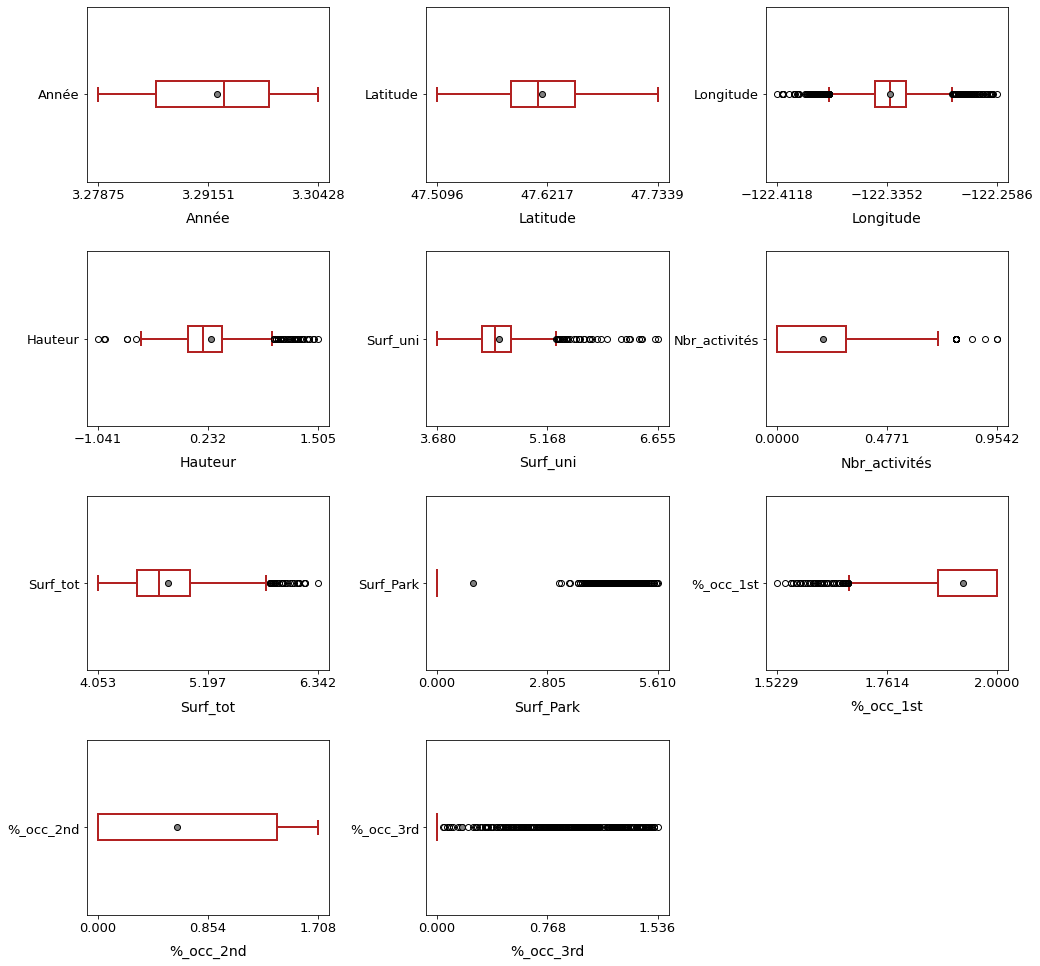

In [5]:
liste_col = data.columns.tolist()

plt.figure(figsize=(16,20))
for i in range (0,11,1):
    plt.subplot(5,3,i+1)
    plt.boxplot(data.iloc[:,i], vert=False, showfliers=True, patch_artist=True, 
                capprops=dict(color="firebrick", linewidth=2),
                boxprops=dict(facecolor="white", color="firebrick", linewidth=2),
                whiskerprops=dict(color="firebrick", linewidth=2),
                medianprops=dict(color="firebrick", linewidth=2),
                showmeans=True, 
                meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'gray'})
    
    plt.yticks([1], labels=[liste_col[i]], fontsize=13)
    mi = min(data.iloc[:,i])
    ma = max(data.iloc[:,i])
    moy = (mi+ma)/2
    ticks = [mi, moy, ma]
    plt.xticks(ticks, fontsize=13)
    plt.xlabel(f"{liste_col[i]}", fontsize=14, labelpad=10)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

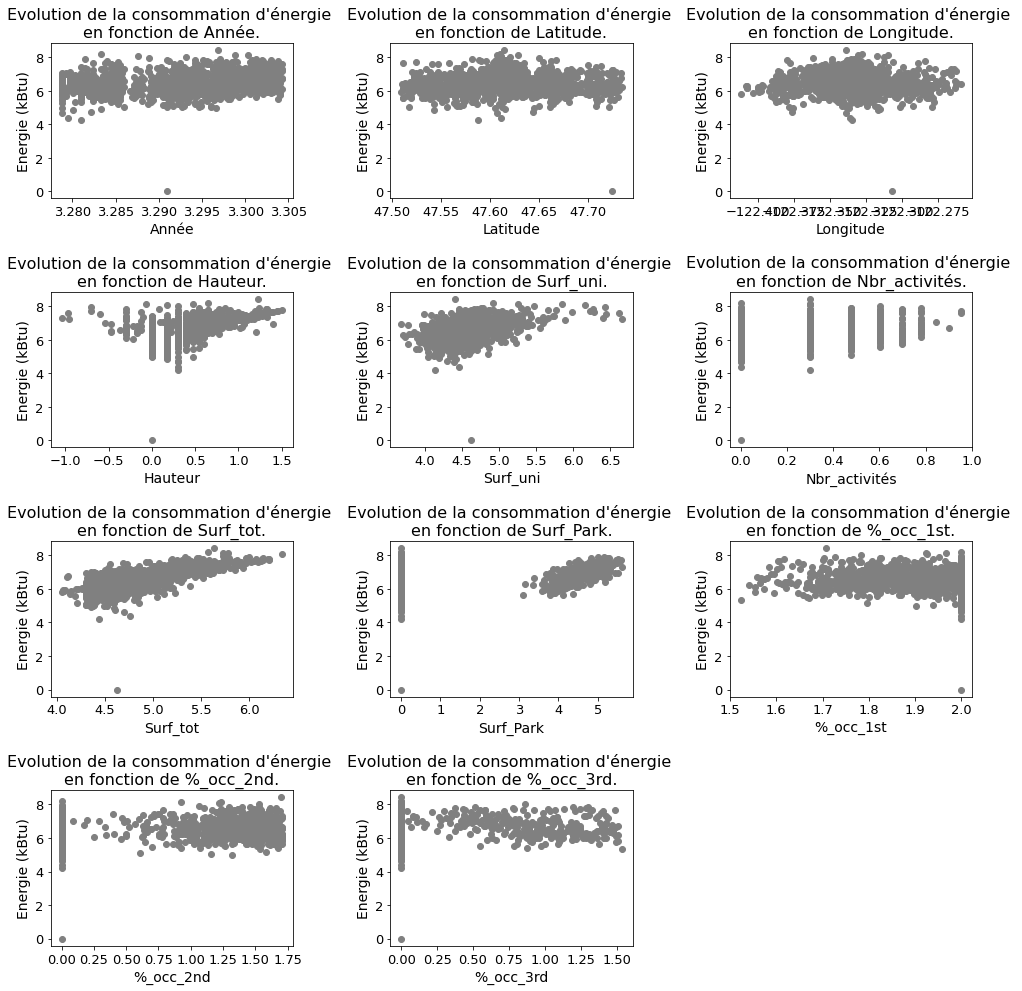

In [6]:
plt.figure(figsize=(16,20))

for i in range (0,11,1):
    plt.subplot(5,3,i+1)
    plt.scatter(data.iloc[:,i], data["Energie"], color = "gray")
    
    #plt.ylim(-1,4)
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.xlabel(f"{liste_col[i]}", fontsize=14)
    plt.ylabel("Energie (kBtu)", fontsize=14)
    
    plt.title("Evolution de la consommation d'énergie \n"f"en fonction de {liste_col[i]}.", fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

Nous pouvons observer sur chaque boxplots qu'il y a toujours des outliers et les échelles ne sont pas encore les mêmes. 
C'est pourquoi nous choisissons de faire une standardisation qui se base sur la médiane car celle-ci n'est pas sensible aux outliers.

De plus, il y a un point isolé ayant une énergie nulle. Nous allons supprimer ce point.

Nous créeons deux jeux de données : un jeu d'entraînement (X_train et y_train) et un jeu de test (X_test et y_test)

In [7]:
data = data.loc[data["Energie"]>0,:]
X = data[data.columns[:11]].values
y = data["Energie"].values
print(X.shape)

(1597, 11)


In [8]:
from sklearn import model_selection, preprocessing
rs=123456789
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=rs)
                                                                    
rob_scale = preprocessing.RobustScaler().fit(X_train)
X_train_rob = rob_scale.transform(X_train)
X_test_rob = rob_scale.transform(X_test)

Nous regardons à présent comment se comporte chaque variable par rapport à la cible qui est ici la consommation d'énergie des bâtiments.

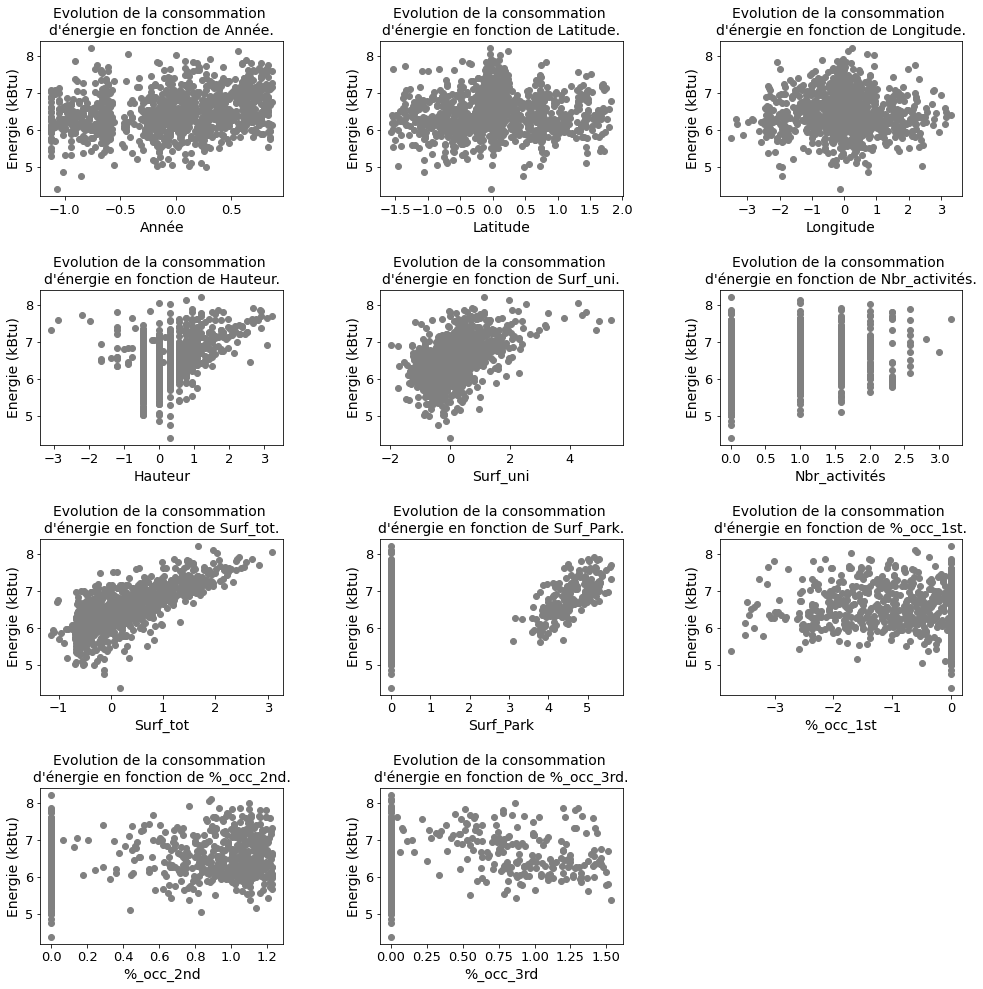

In [9]:
plt.figure(figsize=(16,20))

for i in range (0,11,1):
    plt.subplot(5,3,i+1)
    plt.scatter(X_train_rob[:,i], y_train, color = "gray")
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.xlabel(f"{liste_col[i]}", fontsize=14)
    plt.ylabel("Energie (kBtu)", fontsize=14)
    
    plt.title("Evolution de la consommation \nd'énergie "f"en fonction de {liste_col[i]}.", fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

<a class="anchor" id="section_1_3"></a>
## Régressions linéaires
<a class="anchor" id="section_1_3_1"></a>
### Régression Dummy

Maintenant que les données sont standardisées, nous allons pouvoir commencer la modélisation. 
Nous allons commencer par une modélisation très simple : la régression Dummy. Celle-ci permet de prédire des résultats en utilsant une stratégie simple, ce qui permet d'avoir une valeur seuil.

In [10]:
from sklearn.dummy import DummyRegressor, DummyClassifier

dummy_reg = DummyRegressor(strategy="median")

# Nous optimisons ce régresseur sur le jeu d'entraînement
dummy_reg.fit(X_train_rob, y_train)

# Nous regardons le coefficient de corrélation R2 sur le jeu d'entraînement puis sur le jeu de test.

r2_dummy_train = dummy_reg.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_dummy_train,6)}.")

r2_dummy_test = dummy_reg.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_dummy_test,6)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut -0.013434.
En considérant le jeu de test, le coefficient de corrélation R² vaut -0.02117.


In [11]:
# Nous créeons 3 listes où nous regrouperons les noms des modèles, les scores sur le jeu d'entraînement et sur le jeu de test.

modele_reg = []
r2_comparatif_train = []
r2_comparatif_test = []

# Nous sauvegardons les scores dans les listes prévues à cet effet.
modele_reg.append("Dummy")
r2_comparatif_train.append(r2_dummy_train)
r2_comparatif_test.append(r2_dummy_test)

Sans très grande surprise, nous trouvons un coefficient de corrélation éloigné de 1, ce qui est plutôt attendu au vu du type de régression utilisé.

<a class="anchor" id="section_1_3_2"></a>
### Régression linéaire et polynomiale
Nous allons maintenant utilser la régression linéaire et voir si celui-ci est bien adapté ou non.
De plus, nous allons traçer la courbe d'apprentissage pour savoir quelle est la quantité de données nécessaires pour avoir un score qui ne varie plus avec les données.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

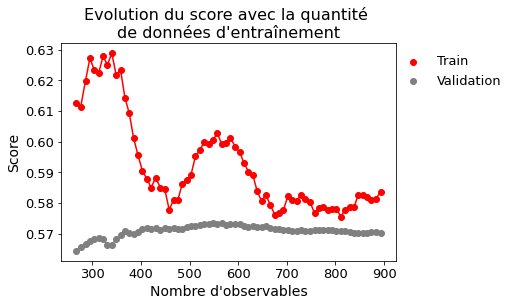

In [13]:
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score, learning_curve


N, train_score, val_score = learning_curve(LinearRegression(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1), fontsize = 13)

plt.show()

Nous voyons qu'à partir de 700 points, nous n'avons pas d'amélioration du score pour les données de validation.
Nous allons entraîner le jeu de données avec le modèle linéaire.

In [14]:
lin_reg.fit(X_train_rob, y_train)

r2_linear_train = lin_reg.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_linear_train,5)}.")

r2_linear_test = lin_reg.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_linear_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.58269.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60462.


In [15]:
modele_reg.append("Linear")
r2_comparatif_train.append(r2_linear_train)
r2_comparatif_test.append(r2_linear_test)

Avec un modèle linéaire, nous obtenons un coefficient de corrélation de 0.605. Le modèle linéaire n'est pas optimal mais reste très correct. Nous continuons en utilisant une régression linéaire polynomiale. Nous allons tester des polynômes de degrés 2.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
degrés = [2]


for deg in degrés:
    X_poly = PolynomialFeatures(deg).fit_transform(X_train_rob)
    lin_reg_poly = LinearRegression().fit(X_poly,y_train)
    
    X_test_poly = PolynomialFeatures(deg).fit_transform(X_test_rob)
    
    r2_poly_train = lin_reg_poly.score(X_poly, y_train)
    r2_poly_test = lin_reg_poly.score(X_test_poly, y_test)
    
    modele_reg.append(f"Poly_{deg}")
    r2_comparatif_train.append(r2_poly_train)
    r2_comparatif_test.append(r2_poly_test)
    print(f"Pour un polynôme de degrée {deg}, le coefficient de corrélation est de {round(r2_poly_test,5)}.")

Pour un polynôme de degrée 2, le coefficient de corrélation est de 0.59651.


En utilsant un polynôme de degré 2, le coefficient de corrélation reste similaire à celui obtenu avec la régression linéaire.

Nous poursuivons notre étude en utilisant un autre modèle linéaire : le modèle ElasticNet.
<a class="anchor" id="section_1_3_3"></a>
### Régression ElasticNet

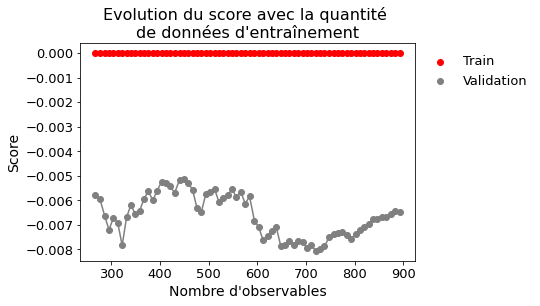

In [17]:
from sklearn.linear_model import ElasticNet

N, train_score, val_score = learning_curve(ElasticNet(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize = 13)

plt.show()

In [18]:
elastic_net = ElasticNet(random_state=rs)
elastic_net.fit(X_train_rob, y_train)

r2_elastic_net_train = elastic_net.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_elastic_net_train,5)}.")

r2_elastic_net_test = elastic_net.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_elastic_net_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.0.
En considérant le jeu de test, le coefficient de corrélation R² vaut -0.00116.


Lorsque nous utilisons le modèle Elastic Net, le coefficient de corrélation est nul. Par défaut, $\alpha$ vaut 1 et l1_ratio est de 0.5. Nous allons donc étudier ces deux hyperparamètres pour savoir si nous pouvons avoir un meilleur coefficient de corrélation.

In [19]:
modele_reg.append("E_N")
r2_comparatif_train.append(r2_elastic_net_train)
r2_comparatif_test.append(r2_elastic_net_test)

In [20]:
n_alphas = 400
alphas = np.logspace(-2.97, 2, n_alphas)
alphas = sorted(np.append(alphas, [1]))
l1_ratio = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1]
param_grid = {"alpha" : alphas, "l1_ratio": l1_ratio}

grid_elastic_net = GridSearchCV(ElasticNet(random_state=rs), param_grid, cv=5, scoring="r2")
grid_elastic_net.fit(X_train_rob, y_train)

print(f"Le meilleur paramètre est : {grid_elastic_net.best_params_}.")
print(f"Le meilleur score moyen est : {grid_elastic_net.best_score_.round(5)}.")

r2_grid_elastic_net_train = grid_elastic_net.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_elastic_net_train,5)}.")

r2_grid_elastic_net_test = grid_elastic_net.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_elastic_net_test,5)}.")

Le meilleur paramètre est : {'alpha': 0.004008505244503715, 'l1_ratio': 0.01}.
Le meilleur score moyen est : 0.56853.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.5803.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60342.


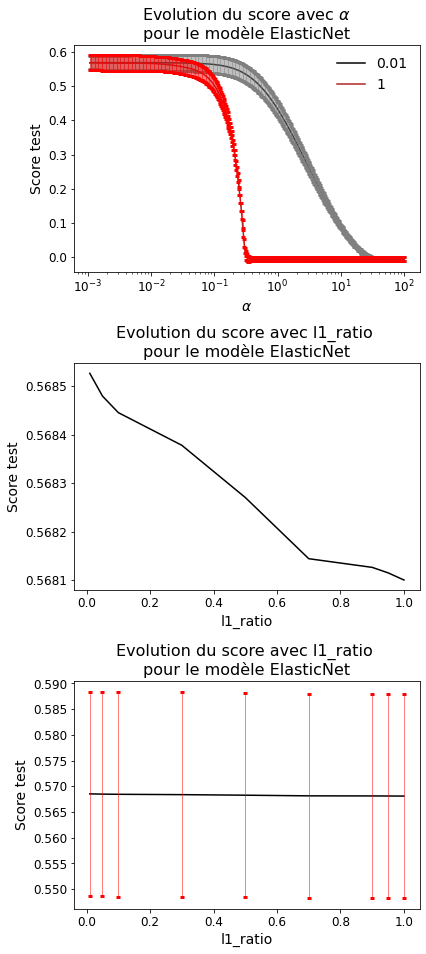

In [21]:
plt.figure(figsize=(6,15))

plt.subplot(311)    

y_e_n_001 = grid_elastic_net.cv_results_["mean_test_score"][0::9]
y_err_e_n_001 = grid_elastic_net.cv_results_["std_test_score"][0::9]

y_e_n_1 = grid_elastic_net.cv_results_["mean_test_score"][8::9]
y_err_e_n_1 = grid_elastic_net.cv_results_["std_test_score"][8::9]

plt.plot(alphas, y_e_n_001, color="black", label="0.01")
plt.errorbar(alphas, y_e_n_001, yerr = y_err_e_n_001, 
             fmt = 'none', capsize = 2, ecolor = 'gray', elinewidth = 0.5, capthick = 3)
plt.plot(alphas, y_e_n_1, color="firebrick", label="1")
plt.errorbar(alphas, y_e_n_1, yerr = y_err_e_n_1, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel(r"$\alpha$", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title(r"Evolution du score avec $\alpha$" "\npour le modèle ElasticNet", fontsize = 16)

plt.legend(frameon=False, fontsize=14)

plt.subplot(312)   

y_l1_ratio = []
y_err_l1_ratio = []
for i in range (0,9,1):
    max_score = grid_elastic_net.cv_results_["mean_test_score"][i::9].max()
    ind_max_score = np.argmax(max_score)
    y_l1_ratio.append(max_score)
    y_err_l1_ratio.append(grid_elastic_net.cv_results_["std_test_score"][ind_max_score])

plt.plot(l1_ratio, y_l1_ratio, color="black")

plt.xlabel("l1_ratio", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec l1_ratio \npour le modèle ElasticNet", fontsize = 16)

plt.subplot(313)   

plt.plot(l1_ratio, y_l1_ratio, color="black")
plt.errorbar(l1_ratio, y_l1_ratio, yerr = y_err_l1_ratio, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("l1_ratio", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec l1_ratio \npour le modèle ElasticNet", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.4)

plt.show()

In [22]:
modele_reg.append("E_N_g")
r2_comparatif_train.append(r2_grid_elastic_net_train)
r2_comparatif_test.append(r2_grid_elastic_net_test)

Lorsque $\alpha$ diminue, le score augmente avec une démarcation plus ou moins franche selon la valeur de l1_ratio (premier graphique).
Si la valeur de l1_ratio tend vers 0, alors la décroissance du score n'est pas très forte et commence pour une valeur de $\alpha$ proche de 1. En revanche, si la valeur de l1_ratio tend vers 1, alors la décroissance du score est plus marquée et celle-ci se fait pour une valeur de $\alpha$ proche de 0.1.

Si nous traçons le score maximum obtenu pour chaque valeur du l1_ratio (graphique centrale et dernier graphique), nous voyons que celui-ci est plutôt stable avec le l1_ratio, avec une très faible différence entre les scores maximums lorsque le l1_ratio varie (variation du score d'environ 0.1 %).


Il est à noter que le coefficient de corrélation est similaire à celui obtenu avec le modèle linéaire. Globalement, les scores et coefficients de corrélations obtenus ici sont bien meilleurs que ceux obtenus pour la prédiction de l'émission en CO<sub>2</sub>.

Nous allons maintenant considérer des modèles ensemblistes.

<a class="anchor" id="section_1_4"></a>
## Régressions ensemblistes

<a class="anchor" id="section_1_4_1"></a>
### Régression RandomForest
Pour les trois modèles que nous allons utiliser, nous allons à la fois faire des modélisations en considérant les hyperparamètres par défaut et en faisant varier les hyperparamètres.

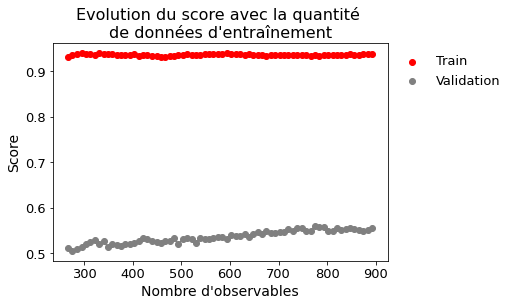

In [23]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

N, train_score, val_score = learning_curve(RandomForestRegressor(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.show()

In [24]:
random_forest = RandomForestRegressor(random_state=rs)
random_forest.fit(X_train_rob, y_train)

r2_random_forest_train = random_forest.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_random_forest_train,5)}.")

r2_random_forest_test = random_forest.score(X_test_rob, y_test)
print( f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_random_forest_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.94158.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.57976.


In [25]:
modele_reg.append("R_F")
r2_comparatif_train.append(r2_random_forest_train)
r2_comparatif_test.append(r2_random_forest_test)

Nous voyons qu'avec le modèle RandomForest, il y a un fort surapprentissage. 
En revanche, le coefficient de corrélation est similaire à celui obtenu avec la régression linéaire.

Nous allons essayer d'optimiser le score moyen en faisant varier le nombre d'estimateurs et le nombre de variables à considérer lors des séparations des branches.

In [26]:
n_random_forest = 10
n_estimators = np.arange(150,250,n_random_forest)
n_estimators = sorted(np.append(n_estimators, [50]))
max_features = ["sqrt", 1, 2, 4, 5]
param_grid = {"n_estimators" : n_estimators, "max_features" : max_features}
grid_random_forest = GridSearchCV(RandomForestRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_random_forest.fit(X_train_rob, y_train)

print(f"Les meilleurs paramètres sont : {grid_random_forest.best_params_}.")
print(f"Le meilleur score moyen est : {grid_random_forest.best_score_.round(5)}.")

r2_grid_random_forest_train = grid_random_forest.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_random_forest_train,5)}.")

r2_grid_random_forest_test = grid_random_forest.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_random_forest_test,5)}.")

Les meilleurs paramètres sont : {'max_features': 4, 'n_estimators': 230}.
Le meilleur score moyen est : 0.57245.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.94245.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60305.


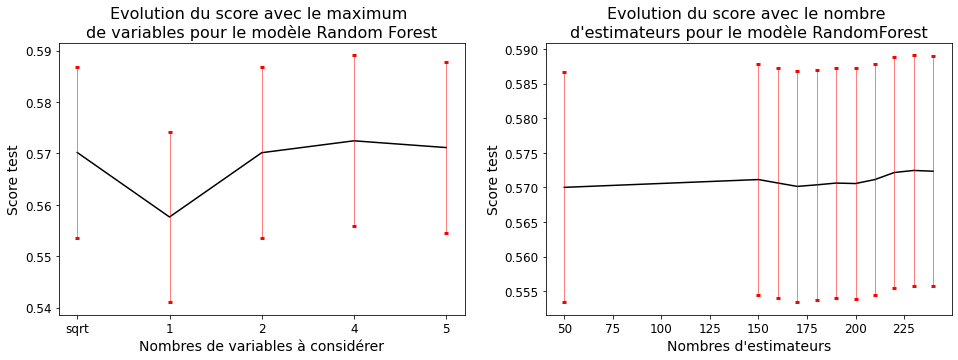

In [27]:
plt.figure(figsize=(16,5))

y_r_feat = []
y_err_r_feat = []

plt.subplot(121)
for i in range (0,55,11):
    max_score = grid_random_forest.cv_results_["mean_test_score"][i:i+11:].max()
    ind_max_score = np.argmax(max_score)
    y_r_feat.append(max_score)
    y_err_r_feat.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])

plt.plot(["sqrt","1","2","4","5"], y_r_feat, color="black")
plt.errorbar(["sqrt","1","2","4","5"], y_r_feat, yerr = y_err_r_feat, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombres de variables à considérer", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le maximum \nde variables pour le modèle Random Forest", fontsize = 16)

plt.subplot(122)

y_r_estim = []
y_err_r_estim = []

for i in range (0,11,1):
    max_score = grid_random_forest.cv_results_["mean_test_score"][i::11].max()
    ind_max_score = np.argmax(max_score)
    y_r_estim.append(max_score)
    y_err_r_estim.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_r_estim, color="black")
plt.errorbar(n_estimators, y_r_estim, yerr = y_err_r_estim, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombres d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle RandomForest", fontsize = 16)

plt.show()

In [28]:
modele_reg.append("R_F_g")
r2_comparatif_train.append(r2_grid_random_forest_train)
r2_comparatif_test.append(r2_grid_random_forest_test)

En optimisant les hyperparamètres, le score moyen est légérement amélioré et est de 0.603.

Lorsque le nombre de variables à considérer est compris entre 1 et 4, le score moyen du test augmente. En revanche, au-delà de 4, le score diminue. 

Concernant le nombre d'estimateurs, le score moyen varie peu entre 150 et 250 estimateurs mais reste supérieur à celui obtenu pour 50 estimateurs. 

Nous poursuivons notre étude en appliquant le modèle AdaBoost.
<a class="anchor" id="section_1_4_2"></a>
### Régression AdaBoost

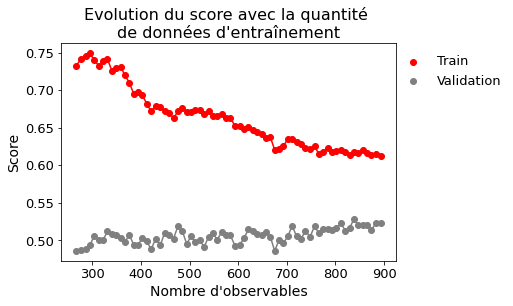

In [29]:
N, train_score, val_score = learning_curve(AdaBoostRegressor(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1), fontsize = 13)

plt.show()

In [30]:
ada_boost = AdaBoostRegressor(random_state=rs)
ada_boost.fit(X_train_rob, y_train)

ada_boost.predict(X_train_rob)

r2_ada_boost_train = ada_boost.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_ada_boost_train,5)}.")

r2_ada_boost_test = ada_boost.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_ada_boost_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.60158.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.58722.


In [31]:
modele_reg.append("Ada")
r2_comparatif_train.append(r2_ada_boost_train)
r2_comparatif_test.append(r2_ada_boost_test)

A l'inverse du modèle RandomForest, il n'y a pas de surapprentissage avec le modèle AdaBoost. Cependant, le coefficient de corrélation est inférieur à celui trouvé avec le RandomForest.

Nous allons voir si nous pouvons optimiser le coefficient de corrélation en faisant varier le taux d'apprentissage et le nombre d'estimateur.

In [32]:
n_ada = 5
n_estimators = np.arange(5,100,n_ada)
learning_rate = np.logspace(-3,0,20)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate" : learning_rate}

grid_ada = GridSearchCV(AdaBoostRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_ada.fit(X_train_rob, y_train)

print(f"Le meilleur paramètre est : {grid_ada.best_params_}.")
print(f"Le meilleur score moyen est : {grid_ada.best_score_.round(5)}.")

r2_grid_ada_train = grid_ada.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_ada_train,5)}.")

r2_grid_ada_test = grid_ada.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_ada_test,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.0379269019073225, 'n_estimators': 10}.
Le meilleur score moyen est : 0.55399.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.57818.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.57587.


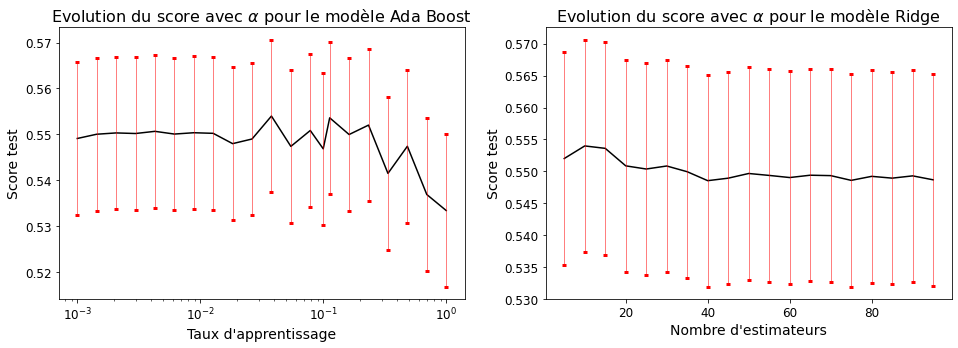

In [33]:
y_ada_learn = []
y_err_ada_learn = []

for i in range (0,399,19):
    max_score = grid_ada.cv_results_["mean_test_score"][i:i+19:].max()
    ind_max_score = np.argmax(max_score)
    y_ada_learn.append(max_score)
    y_err_ada_learn.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])
    
plt.figure(figsize=(16,5))
plt.subplot(121)

plt.plot(learning_rate, y_ada_learn, color="black")
plt.errorbar(learning_rate, y_ada_learn, yerr = y_err_ada_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title(r"Evolution du score avec $\alpha$ pour le modèle Ada Boost", fontsize = 16)

plt.subplot(122)

y_ada_esti = []
y_err_ada_esti = []
for i in range (0,19,1):
    max_score = grid_ada.cv_results_["mean_test_score"][i::19].max()
    ind_max_score = np.argmax(max_score)
    y_ada_esti.append(max_score)
    y_err_ada_esti.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_ada_esti, color="black")
plt.errorbar(n_estimators, y_ada_esti, yerr = y_err_ada_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title(r"Evolution du score avec $\alpha$ pour le modèle Ridge", fontsize = 16)

plt.show()

In [34]:
modele_reg.append("Ada_g")
r2_comparatif_train.append(r2_grid_ada_train)
r2_comparatif_test.append(r2_grid_ada_test)

Pour le modèle AdaBoost, le score reste stable pour un taux d'apprentissage inférieur à 10<sup>-2</sup>. Ensuite, le score moyen oscille pour un taux d'apprentissage compris entre 10<sup>-2</sup> et 1, tout en diminuant globalement. En revanche,  Le score varie peu avec le nombre d'estimateurs.

Nous allons étudier le dernier modèle ensembliste.
<a class="anchor" id="section_1_4_3"></a>
### Régression Gradient Boosting

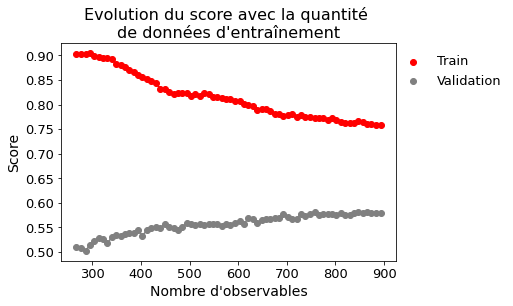

In [35]:
N, train_score, val_score = learning_curve(GradientBoostingRegressor(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1), fontsize = 13)

plt.show()

In [36]:
grad_boost = GradientBoostingRegressor(random_state=rs)
grad_boost.fit(X_train_rob, y_train)

grad_boost.predict(X_train_rob)

r2_grad_boost_train = grad_boost.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grad_boost_train,5)}.")

r2_grad_boost_test = grad_boost.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grad_boost_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.7369.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.61387.


In [37]:
modele_reg.append("Grad")
r2_comparatif_train.append(r2_grad_boost_train)
r2_comparatif_test.append(r2_grad_boost_test)

Comme le montre la courbe d'apprentissage, il y a un surapprentissage avec le modèle Gradient Boosting mais qui reste moins marqué qu'avec le RandomForest. 

Concernant le coefficient de corrélation, celui-ci est légérement au-dessus de ceux obtenus précédemment et est de 0.614.

Nous allons optimiser ce modèle en faisant varier le taux d'apprentissage et le nombre d'estimateur.

In [38]:
n_grad = 5
n_estimators = np.arange(90,160,n_grad)
learning_rate = np.logspace(-2,0,15)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate": learning_rate}

grid_grad = GridSearchCV(GradientBoostingRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_grad.fit(X_train_rob, y_train)

print(f"Le meilleur paramètre est : {grid_grad.best_params_}.")
print(f"Le meilleur score moyen est : {grid_grad.best_score_.round(5)}.")

r2_grid_grad_train = grid_grad.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_grad_train,5)}.")

r2_grid_grad_test = grid_grad.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_grad_test,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.0517947467923121, 'n_estimators': 135}.
Le meilleur score moyen est : 0.58572.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.70156.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.61639.


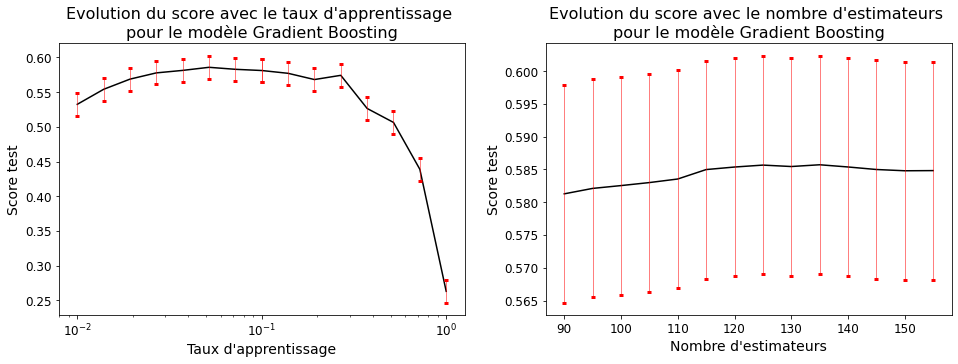

In [39]:
y_grad_learn = []
y_err_grad_learn = []

for i in range (0,224,14):
    max_score = grid_grad.cv_results_["mean_test_score"][i:i+14:].max()
    ind_max_score = np.argmax(max_score)
    y_grad_learn.append(max_score)
    y_err_grad_learn.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])

plt.figure(figsize=(16,5))
plt.subplot(121)

plt.plot(learning_rate, y_grad_learn, color="black")
plt.errorbar(learning_rate, y_grad_learn, yerr = y_err_grad_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xscale("log")

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le taux d'apprentissage \npour le modèle Gradient Boosting", fontsize = 16)

plt.subplot(122)

y_grad_esti = []
y_err_grad_esti = []

for i in range (0,14,1):
    max_score = grid_grad.cv_results_["mean_test_score"][i::14].max()
    ind_max_score = np.argmax(max_score)
    y_grad_esti.append(max_score)
    y_err_grad_esti.append(grid_random_forest.cv_results_["std_test_score"][ind_max_score])
    
plt.plot(n_estimators, y_grad_esti, color="black")
plt.errorbar(n_estimators, y_grad_esti, yerr = y_err_grad_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le nombre d'estimateurs \npour le modèle Gradient Boosting", fontsize = 16)

plt.show()

In [40]:
modele_reg.append("Grad_g")
r2_comparatif_train.append(r2_grid_grad_train)
r2_comparatif_test.append(r2_grid_grad_test)

Après avoir fait optimiser certains hyperparamètres, nous obtenons un coefficient de corrélation de 0.616. Il y a eu une très légére amélioration du coefficient de corrélation.

Lorsque le taux d'apprentissage est compris entre 10<sup>-2</sup> et 5.10<sup>-2</sup>, nous pouvons voir que le score augmente. Au-delà d'un taux d'apprentissage de 5.10<sup>-2</sup>, le score diminue.

Le nombre d'estimateur a un faible impact sur le score du test moyen car ce dernier varie peu avec le nombre d'estimateur.

Nous allons nous concentrer sur un modèle différent de ceux abordés précedemment : le modèle KNeighbors (KNN). 
<a class="anchor" id="section_1_5"></a>
### Régression KNN

Comme précédemment, nous étudions d'abord le modèle "simple", puis nous regardons l'effet d'hyperparamètres.

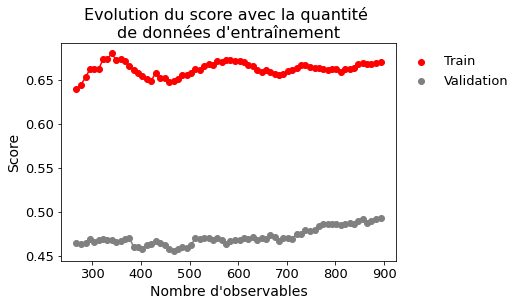

In [41]:
from sklearn.neighbors import KNeighborsRegressor

N, train_score, val_score = learning_curve(KNeighborsRegressor(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize = 13)

plt.show()

In [42]:
knn = KNeighborsRegressor()
knn.fit(X_train_rob, y_train)

r2_knn_train = knn.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_knn_train,5)}.")

r2_knn_test = knn.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_knn_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.6747.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.50441.


In [43]:
modele_reg.append("KNN")
r2_comparatif_train.append(r2_knn_train)
r2_comparatif_test.append(r2_knn_test)

Après avoir appliqué le modèle KNN, nous voyons que :
- le modèle surapprend au vu de la différence observée entre la courbe de validation et la courbe d'entraînement et
- le coefficient de corrélation est d'environ 0.504, ce qui est moins élevé que le coefficient de régression obtenu avec les modèles linéaires.

Nous étudions l'effet du nombre de voisins ainsi que la métrique.

In [44]:
voisins = np.arange(1,41,1)
param_grid = {'n_neighbors': voisins, "metric":["l1","l2"]}

grid_knn = model_selection.GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring="r2")
grid_knn.fit(X_train_rob, y_train)

print(f"Le meilleur paramètre est : {grid_knn.best_params_}.")
print(f"Le meilleur score moyen est : {grid_knn.best_score_.round(5)}.")

r2_grid_knn_train = grid_knn.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_knn_train,5)}.")

r2_grid_knn_test = grid_knn.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_knn_test,5)}.")

Le meilleur paramètre est : {'metric': 'l1', 'n_neighbors': 13}.
Le meilleur score moyen est : 0.52587.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.59703.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.55408.


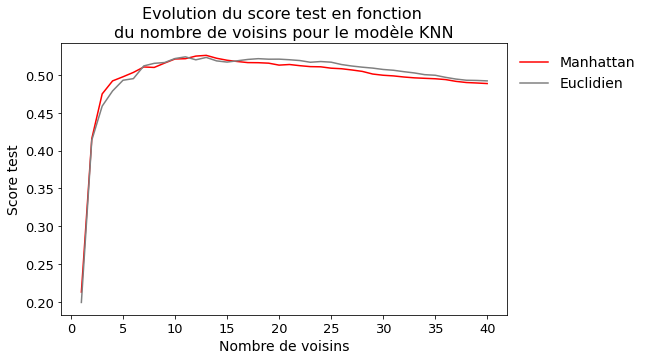

In [45]:
y_1 = grid_knn.cv_results_["mean_test_score"][0:40]
y_2 = grid_knn.cv_results_["mean_test_score"][40:]
y_err_1 = grid_knn.cv_results_["std_test_score"][0:40]
y_err_2 = grid_knn.cv_results_["std_test_score"][40:]

plt.figure(figsize=(8,5))

plt.plot(voisins, y_1, label="Manhattan", color="red")
#plt.errorbar(voisins, y_1, yerr = y_err_1, fmt = 'none', capsize = 5, ecolor = 'red', elinewidth = 0.5, capthick = 3)
plt.plot(voisins, y_2, label="Euclidien", color="gray")
#plt.errorbar(voisins, y_2, yerr = y_err_2, fmt = 'none', capsize = 5, ecolor = 'gray', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score test en fonction \ndu nombre de voisins pour le modèle KNN", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)
plt.show()

In [46]:
modele_reg.append("KNN_g")
r2_comparatif_train.append(r2_grid_knn_train)
r2_comparatif_test.append(r2_grid_knn_test)

Pour le modèle KNN, nous venons de faire varier le nombre de voisins et la métrique (Manhattan et Euclidienne). Nous pouvons voir sur le graphique ci-haut que le score augmente de 1 voisin à 13 voisins, puis diminue lentement lorsque le nombre de voisins augmente, et ce, quel que soit la métrique. 

Néanmoins, même avec les meilleurs paramètres (13 voisins et la distance de Manhattan), le coefficient de regréssion reste en dessous de ceux obtenus pour les régressions linéaires et ensemblistes.

Nous allons tester un dernier modèle qui est le modèle Support Vector Regressor (SVR).

<a class="anchor" id="section_1_6"></a>
### Régression SVR

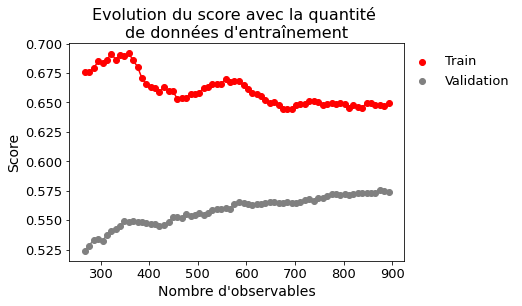

In [47]:
from sklearn.svm import SVR

N, train_score, val_score = learning_curve(SVR(), X_train_rob, y_train, 
                                           train_sizes=np.linspace(0.3,1,70), cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1), fontsize = 13)

plt.show()

In [48]:
svr = SVR()
svr.fit(X_train_rob, y_train)

r2_svr_train = svr.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_svr_train,5)}.")

r2_svr_test = svr.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_svr_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64546.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60891.


In [49]:
modele_reg.append("SVR")
r2_comparatif_train.append(r2_svr_train)
r2_comparatif_test.append(r2_svr_test)

Avec le modèle SVR et en utilisant les paramètres par défaut, nous avons un coefficient de corrélation proche de ceux obtenus pour une régression linéaire. Cependant, comme nous pouvons le voir sur les courbes d'apprentissages, la courbe de validation augmente sans pour autant atteindre de plateau. Avec plus de données, nous aurions peut-être pu améliorer le score du modèle SVR.

Nous allons faire varier plusieurs hyperparamètres : le kernel, C et $\epsilon$.

Comme l'entraînement est très long, nous allons procéder par étape en déterminant d'abord le kernel le plus adapté entre linéaire, rbf et polynomiale, en considérant des polynômes de degrés 2, 3 et 4. 

In [50]:
kernel = ["linear", "poly", "rbf"]
degree = [2,3,4]
param_grid = {"kernel" : kernel, 'degree': degree}

grid_svr_k = model_selection.GridSearchCV(SVR(), param_grid, cv=5, scoring="r2")

grid_svr_k.fit(X_train_rob, y_train)

print(f"Le meilleur paramètre est : {grid_svr_k.best_params_}.")
print(f"Le meilleur score moyen est : {grid_svr_k.best_score_.round(5)}.")

r2_grid_svr_train_k = grid_svr_k.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train_k,5)}.")

r2_grid_svr_test_k = grid_svr_k.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test_k,5)}.")

Le meilleur paramètre est : {'degree': 2, 'kernel': 'rbf'}.
Le meilleur score moyen est : 0.57327.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64546.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60891.


In [51]:
kern_lin = grid_svr_k.cv_results_["mean_test_score"][0]

deg_2 = grid_svr_k.cv_results_["mean_test_score"][1]
deg_3 = grid_svr_k.cv_results_["mean_test_score"][4]
deg_4 = grid_svr_k.cv_results_["mean_test_score"][7]

kern_rbf = grid_svr_k.cv_results_["mean_test_score"][2]

print(f"Pour le kernel linéaire, le score est de : {round(kern_lin,5)}.""\n")
print(f"Pour le kernel rbf, le score est de : {round(kern_rbf,5)}.""\n")
print(f"Pour un polynôme de degré 2, le score est de : {round(deg_2,5)}.""\n")
print(f"Pour un polynôme de degré 3, le score est de : {round(deg_3,5)}.""\n")
print(f"Pour un polynôme de degré 4, le score est de : {round(deg_4,5)}.")

Pour le kernel linéaire, le score est de : 0.56909.

Pour le kernel rbf, le score est de : 0.57327.

Pour un polynôme de degré 2, le score est de : 0.41586.

Pour un polynôme de degré 3, le score est de : 0.45601.

Pour un polynôme de degré 4, le score est de : -0.12258.


Nous pouvons voir que les kernels linéaires et rbf ont des scores très proches et c'est pourquoi nous allons les conserver. En revanche, nous n'allons plus considérer le kernel polynomiale.

Nous allons faire varier l'hyperparamètre C.

In [52]:
c = np.logspace(-4,1,100)
c = sorted(np.append(c, [1]))

kernel = ["linear", "rbf"]
param_grid = {'C': c, "kernel" : kernel}
grid_svr_c = model_selection.GridSearchCV(SVR(),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr_c.fit(X_train_rob, y_train)
print(f"Le meilleur score moyen est de : {grid_svr_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_c.best_params_}")

r2_grid_svr_train_c = grid_svr_c.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train_c,5)}.")

r2_grid_svr_test_c = grid_svr_c.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test_c,5)}.")

Le meilleur score moyen est de : 0.57385.
Les meilleurs paramètres sont : {'C': 0.6892612104349695, 'kernel': 'rbf'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.63711.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.6089.


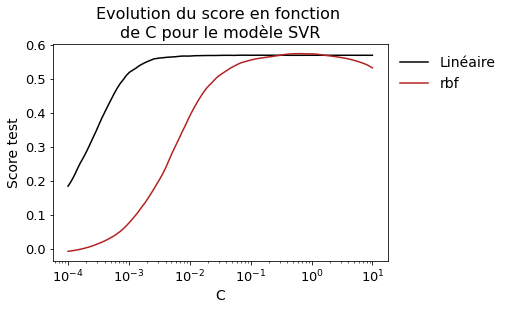

In [53]:
y_svr_lin = grid_svr_c.cv_results_["mean_test_score"][0::2]
y_sco_rbf = grid_svr_c.cv_results_["mean_test_score"][1::2]

plt.plot(c, y_svr_lin, label = "Linéaire", color="black")
plt.plot(c, y_sco_rbf, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel("C", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde C pour le modèle SVR", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

Nous pouvons observer sur le graphique ci-haut que :
- pour le kernel linéaire, le score augmente jusqu'à C = 10<sup>-3</sup> et reste stable. 
- pour le modèle rbf, le score augmente jusqu'à une valeur de C = 0.7 puis diminue.

Nous allons cette fois-ci étudier l'hyperparamètres $\epsilon$.

In [54]:
epsilon = np.logspace(-2,1,200)
epsilon = sorted(np.append(epsilon, [0.1]))
kernel = ["linear", "rbf"]
param_grid = {'epsilon': epsilon, "kernel" : kernel}
grid_svr_epsilon = model_selection.GridSearchCV(SVR(),
                                                param_grid,
                                                cv=5, scoring="r2")

grid_svr_epsilon.fit(X_train_rob, y_train)
print(f"Le meilleur score moyen est de : {grid_svr_epsilon.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_epsilon.best_params_}")

r2_grid_svr_train_eps = grid_svr_epsilon.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train_eps,5)}.")

r2_grid_svr_test_eps = grid_svr_epsilon.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test_eps,5)}.")

Le meilleur score moyen est de : 0.57348.
Les meilleurs paramètres sont : {'epsilon': 0.09547716114208056, 'kernel': 'rbf'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64562.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60968.


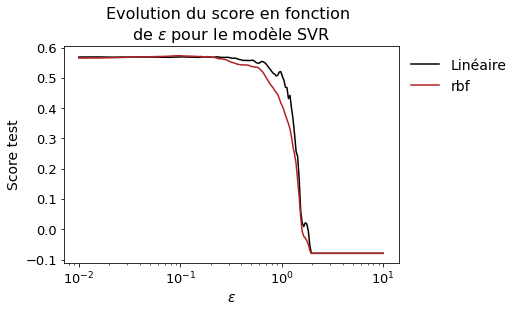

In [55]:
y_svr_lin = grid_svr_epsilon.cv_results_["mean_test_score"][0::2]
y_svr_rbf = grid_svr_epsilon.cv_results_["mean_test_score"][1::2]

plt.plot(epsilon, y_svr_lin, label = "Linéaire", color="black")

plt.plot(epsilon, y_svr_rbf, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel(r"$\epsilon$", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde" r" $\epsilon$ pour le modèle SVR", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

Sur le graphique ci-haut, nous voyons un comportement très similaire à celui vu dans la régréssion ElasticNet (pour les deux kernels) lorsque $\alpha$ varie :
- quand $\epsilon$ est inférieur à 10<sup>-1</sup>, le score varie peu et reste très élevé,
- lorque $\epsilon$ est proche et dépasse 1, le score diminue fortement
- enfin au delà de 1, le score reste stable et est à son minimum.

Nous allons faire une dernière modélisation en considérant C, $\epsilon$ et un kernel rbf.

In [56]:
epsilon = np.logspace(-1.5,0.5,50)
kernel = ["rbf"]
c = np.logspace(-4,1,20)
c = sorted(np.append(c, [1]))
epsilon = sorted(np.append(epsilon, [0.1]))
param_grid = {'epsilon': epsilon, "kernel" : kernel, "C" : c}
grid_svr = model_selection.GridSearchCV(SVR(),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr.fit(X_train_rob, y_train)
print(f"Le meilleur score moyen est de : {grid_svr.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr.best_params_}")

r2_grid_svr_train = grid_svr.score(X_train_rob, y_train)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train,5)}.")

r2_grid_svr_test = grid_svr.score(X_test_rob, y_test)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test,5)}.")

Le meilleur score moyen est de : 0.57343.
Les meilleurs paramètres sont : {'C': 0.8858667904100823, 'epsilon': 0.08891593339164641, 'kernel': 'rbf'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64302.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.61034.


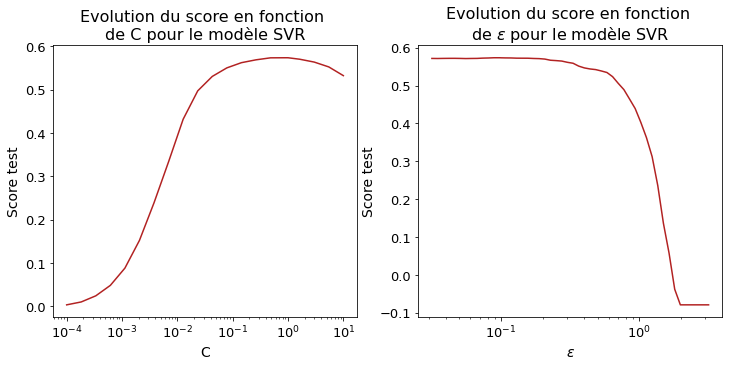

In [57]:
y_rbf_c = []

for i in range (0,1071,51):
    y_rbf_c.append(grid_svr.cv_results_["mean_test_score"][i:i+51].max())
    
plt.figure(figsize=(12,5))    
plt.subplot(121)

plt.plot(c, y_rbf_c, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel("C", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde C pour le modèle SVR", fontsize=16)

plt.subplot(122)

y_rbf_eps = []

for i in range (0,51,1):
    y_rbf_eps.append(grid_svr.cv_results_["mean_test_score"][i::51].max())
    
plt.subplot(122)

plt.plot(epsilon, y_rbf_eps, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel(r"$\epsilon$", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde" r" $\epsilon$ pour le modèle SVR", fontsize=16)

plt.show()

In [58]:
modele_reg.append("SVR_g")
r2_comparatif_train.append(r2_grid_svr_train)
r2_comparatif_test.append(r2_grid_svr_test)

Le modèle SVR utilisé ici nous permet d'améliorer légérement le coefficient de corrélation. 
Bien qu'il y ait une amélioration, cette méthode de calcul est très coûteuse en temps. Il faut plusieurs minutes pour que l'entraînement se termine avec la méthode SVR et quelques secondes avec les méthodes linéaires. 

Nous allons maintenant comparer les scores moyens des différents modèles. 

In [59]:
erreur_1 = np.argmax(grid_elastic_net.cv_results_["mean_test_score"])
err_e_n_g = (grid_elastic_net.cv_results_["std_test_score"][erreur_1])

erreur_2 = np.argmax(grid_random_forest.cv_results_["mean_test_score"])
err_r_f_g = (grid_random_forest.cv_results_["std_test_score"][erreur_2])

erreur_3 = np.argmax(grid_ada.cv_results_["mean_test_score"])
err_ada_g = (grid_ada.cv_results_["std_test_score"][erreur_3])

erreur_4 = np.argmax(grid_grad.cv_results_["mean_test_score"])
err_grad_g = (grid_grad.cv_results_["std_test_score"][erreur_4])

erreur_5 = np.argmax(grid_knn.cv_results_["mean_test_score"])
err_knn_g = (grid_knn.cv_results_["std_test_score"][erreur_5])

erreur_6 = np.argmax(grid_svr.cv_results_["mean_test_score"])
err_svr_g = (grid_svr.cv_results_["std_test_score"][erreur_6])

err_comp = [0, 0, 0, err_e_n_g, err_r_f_g, err_ada_g, err_grad_g, err_knn_g, err_svr_g]

modele = ["Dummy", "Linéaire", "Poly (2)", "ElasticN", "RandomF", "AdaBoost", "Gradient", "KNN", "SVR"]



In [60]:
r2_test = r2_comparatif_test
del r2_test[3::2]
print(len(r2_test))
print(len(err_comp))

9
9


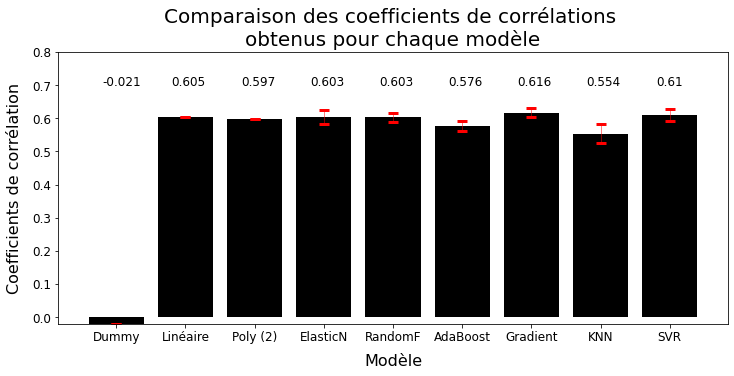

In [61]:
plt.figure(figsize=(12,5))

plt.bar(height = r2_test, x = modele, color="black")
plt.errorbar(modele, r2_test, err_comp, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)
for i in range (0, len(r2_test),1): 
    if np.abs(r2_test[i])<1:
        plt.text(i-0.2, 0.7, f"{round(r2_test[i],3)}",fontsize=12)
    else:
        plt.text(i-0.5, 0.7, format(r2_test[i], "10.0E"),fontsize=12)

plt.ylim(-0.02,0.8)

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Coefficients de corrélation", fontsize=16, labelpad = 10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Comparaison des coefficients de corrélations \nobtenus pour chaque modèle", fontsize=20)
plt.show()

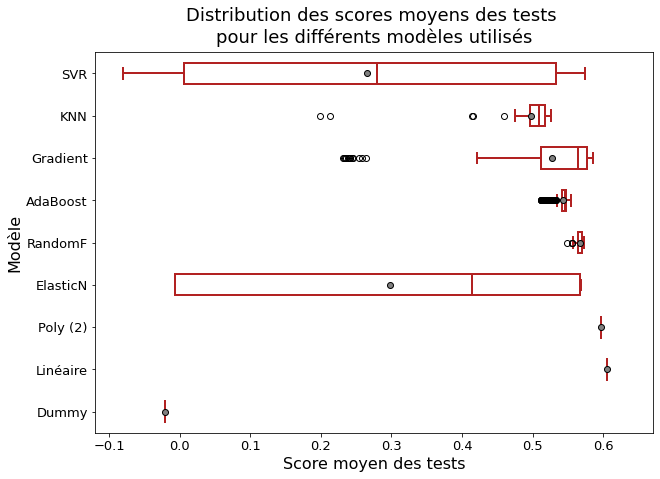

In [62]:
dist_mean_score = []
dist_mean_score.append(r2_dummy_test)
dist_mean_score.append(r2_linear_test)
dist_mean_score.append(r2_poly_test)
dist_mean_score.append(grid_elastic_net.cv_results_["mean_test_score"])
dist_mean_score.append(grid_random_forest.cv_results_["mean_test_score"])
dist_mean_score.append(grid_ada.cv_results_["mean_test_score"])
dist_mean_score.append(grid_grad.cv_results_["mean_test_score"])
dist_mean_score.append(grid_knn.cv_results_["mean_test_score"] )
dist_mean_score.append(grid_svr.cv_results_["mean_test_score"])

plt.figure(figsize=(10,7))

plt.boxplot(dist_mean_score, vert=False, showfliers=True, patch_artist=True, 
            capprops=dict(color="firebrick", linewidth=2),
            boxprops=dict(facecolor="white", color="firebrick", linewidth=2),
            whiskerprops=dict(color="firebrick", linewidth=2),
            medianprops=dict(color="firebrick", linewidth=2),
            showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'gray'})
plt.xlim(-0.12,0.67)

plt.xlabel("Score moyen des tests", fontsize=16)
plt.ylabel("Modèle", fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(np.arange(1,10), modele, fontsize=13)

plt.title("Distribution des scores moyens des tests \npour les différents modèles utilisés", fontsize=18, pad=10)
plt.show()


Mise à part le modèle Dummy, les coéfficients de corrélation sont tous proches de 0.60. Les modèles KNN et AdaBost donnent des coefficient de corrélations légérement inférieur à 0.60 (entre 0.55 et 0.58).

En revanche, parmi ces modèles là, seuls les modèles RandomForest et AdaBoost ont des scores de tests moyens peu dispersés. 

Nous allons reprendre la même étude en y ajoutant certaines variables catégorielles afin d'évaluer l'apport de ces dernières sur le coefficient de corrélation.

<a class="anchor" id="chapter2"></a>
# Chapitre 2 : Ajout des variables catégorielles

Nous allons ajouter dans notre modèle 2 variables catégorielles : 
- le quartier en utilisant la notation "compact" (Nord, Centre, Sud), 
- l'usage des bâtiments qui est une colonne regroupant les valeurs de la colonne sur le type de propriétés principales,
- la combinaison des sources d'énergies nécessaires pour alimenter un bâtiment,
- le type de bâtiment et
- la conformité du bâtiment.

En revanche, ce ne sont pas des données numériques il nous faut donc les encoder pour que les modèles mathématiques puissent les incorporer dans leurs calculs sans rencontrer de problèmes. 

<a class="anchor" id="section_2_1"></a>
## Encodage des données

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(), ["Quartier_compact", "Usage_bâtiments", "Source_energie", 
                                                         "BuildingType","ComplianceStatus"]),
                                      remainder='passthrough', verbose_feature_names_out=False)

In [64]:
transformed = transformer.fit_transform(data)
display(transformer.get_feature_names_out())
data_enc = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

display(data_enc.info())

array(['Quartier_compact_Centre', 'Quartier_compact_Nord',
       'Quartier_compact_Sud', 'Usage_bâtiments_Autres',
       'Usage_bâtiments_Bureaux', 'Usage_bâtiments_Ecoles',
       'Usage_bâtiments_Entrepôts', 'Usage_bâtiments_Sciences',
       'Source_energie_Elec', 'Source_energie_Elec_Eau',
       'Source_energie_Elec_Eau_Gaz', 'Source_energie_Elec_Gaz',
       'Source_energie_Gaz', 'Source_energie_Rien', 'BuildingType_Campus',
       'BuildingType_NonResidential', 'BuildingType_Nonresidential COS',
       'BuildingType_Nonresidential WA', 'BuildingType_SPS-District K-12',
       'ComplianceStatus_Compliant',
       'ComplianceStatus_Error - Correct Default Data',
       'ComplianceStatus_Non-Compliant', 'Année', 'Latitude', 'Longitude',
       'Hauteur', 'Surf_uni', 'Nbr_activités', 'Surf_tot', 'Surf_Park',
       '%_occ_1st', '%_occ_2nd', '%_occ_3rd', 'ENERGYSTARScore', 'CO2',
       'Energie'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Quartier_compact_Centre                        1597 non-null   float64
 1   Quartier_compact_Nord                          1597 non-null   float64
 2   Quartier_compact_Sud                           1597 non-null   float64
 3   Usage_bâtiments_Autres                         1597 non-null   float64
 4   Usage_bâtiments_Bureaux                        1597 non-null   float64
 5   Usage_bâtiments_Ecoles                         1597 non-null   float64
 6   Usage_bâtiments_Entrepôts                      1597 non-null   float64
 7   Usage_bâtiments_Sciences                       1597 non-null   float64
 8   Source_energie_Elec                            1597 non-null   float64
 9   Source_energie_Elec_Eau                        1597 

None

In [65]:
data_enc.describe()

,Quartier_compact_Centre,Quartier_compact_Nord,Quartier_compact_Sud,Usage_bâtiments_Autres,Usage_bâtiments_Bureaux,Usage_bâtiments_Ecoles,Usage_bâtiments_Entrepôts,Usage_bâtiments_Sciences,Source_energie_Elec,Source_energie_Elec_Eau,...,Surf_uni,Nbr_activités,Surf_tot,Surf_Park,%_occ_1st,%_occ_2nd,%_occ_3rd,ENERGYSTARScore,CO2,Energie
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,...,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1069.000000,1597.000000,1597.000000
mean,0.495304,0.210394,0.294302,0.306199,0.284909,0.105197,0.256731,0.046963,0.251096,0.031309,...,4.515079,0.199915,4.788047,0.904719,1.925638,0.614894,0.170244,1.717204,149.342342,6.468509
std,0.500135,0.407716,0.455871,0.461058,0.451513,0.306904,0.436967,0.211626,0.433779,0.174205,...,0.347028,0.219540,0.404286,1.828038,0.106851,0.697549,0.389272,0.395366,360.563512,0.561718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680248,0.000000,4.052540,0.000000,1.522879,0.000000,0.000000,0.000000,-0.800000,4.225565
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.280465,0.000000,4.465189,0.000000,1.871404,0.000000,0.000000,1.681241,20.180000,6.095235
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.467376,0.301030,4.688331,0.000000,2.000000,0.000000,0.000000,1.863323,49.580000,6.408916
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,4.683711,0.301030,5.012546,0.000000,2.000000,1.390472,0.000000,1.949390,139.720000,6.836273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.654972,0.954243,6.342423,5.610443,2.000000,1.707570,1.535716,2.000000,6330.910000,8.438831


Nous venons d'encoder cinq colonnes en utilisant le OneHotEncoder de telle sorte à associer une colonne du dataframe à une catégorie comportant les valeurs 0 et 1. Cet encodage a crée au final 22 colonnes supplémentaires.

Nous allons ensuite poursuivre en séparant les données en jeu d'entraînement et en jeu de test et en faisant une standardisation comme précédemment.

In [66]:
X_enc = data_enc[data_enc.columns[0:33]].values
y_enc = data_enc["Energie"].values

X_train_c, X_test_c, y_train_c, y_test_c = model_selection.train_test_split(X_enc, y_enc, test_size=0.3, 
                                                                            random_state=rs)

rob_scale = preprocessing.RobustScaler()
X_train_rob_c = X_train_c
X_train_rob_c[:,22:] = rob_scale.fit_transform(X_train_c[:,22:])

X_test_rob_c = X_test_c
X_test_rob_c[:,22:] = rob_scale.fit_transform(X_test_rob_c[:,22:])

In [67]:
data_enc.describe()

,Quartier_compact_Centre,Quartier_compact_Nord,Quartier_compact_Sud,Usage_bâtiments_Autres,Usage_bâtiments_Bureaux,Usage_bâtiments_Ecoles,Usage_bâtiments_Entrepôts,Usage_bâtiments_Sciences,Source_energie_Elec,Source_energie_Elec_Eau,...,Surf_uni,Nbr_activités,Surf_tot,Surf_Park,%_occ_1st,%_occ_2nd,%_occ_3rd,ENERGYSTARScore,CO2,Energie
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,...,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1069.000000,1597.000000,1597.000000
mean,0.495304,0.210394,0.294302,0.306199,0.284909,0.105197,0.256731,0.046963,0.251096,0.031309,...,4.515079,0.199915,4.788047,0.904719,1.925638,0.614894,0.170244,1.717204,149.342342,6.468509
std,0.500135,0.407716,0.455871,0.461058,0.451513,0.306904,0.436967,0.211626,0.433779,0.174205,...,0.347028,0.219540,0.404286,1.828038,0.106851,0.697549,0.389272,0.395366,360.563512,0.561718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680248,0.000000,4.052540,0.000000,1.522879,0.000000,0.000000,0.000000,-0.800000,4.225565
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.280465,0.000000,4.465189,0.000000,1.871404,0.000000,0.000000,1.681241,20.180000,6.095235
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.467376,0.301030,4.688331,0.000000,2.000000,0.000000,0.000000,1.863323,49.580000,6.408916
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,4.683711,0.301030,5.012546,0.000000,2.000000,1.390472,0.000000,1.949390,139.720000,6.836273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.654972,0.954243,6.342423,5.610443,2.000000,1.707570,1.535716,2.000000,6330.910000,8.438831


L'encodage a permis de transformer des valeurs catégorielles en valeurs numériques et un nouveau dataframe a été crée avec les variables encodées et celles qui n'ont pas été encodées. Nous pouvons commencer la modélisation en débutant par la régression Dummy.

<a class="anchor" id="section_2_2"></a>
## Régressions linéaires
<a class="anchor" id="section_2_2_1"></a>
### Régression Dummy

In [68]:
dummy_reg_c = DummyRegressor(strategy="median")
dummy_reg_c.fit(X_train_rob_c, y_train_c)

r2_dummy_train_c = dummy_reg_c.score(X_train_rob_c,y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_dummy_train_c,5)}.")

r2_dummy_test_c = dummy_reg_c.score(X_test_rob_c,y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_dummy_test_c,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut -0.01343.
En considérant le jeu de test, le coefficient de corrélation R² vaut -0.02117.


Comme dans la première partie du notebook, nous allons créer une liste regroupant tous les coefficents de corrélation du jeu d'entraînement et du jeu de test.

In [69]:
r2_comparatif_train_c = []
r2_comparatif_test_c = []

r2_comparatif_train_c.append(r2_dummy_train_c)
r2_comparatif_test_c.append(r2_dummy_test_c)

La régression Dummy nous donne un coefficent de corrélation proche de 0, comme attendu. Nous allons utiliser la régression linéaire et polynômiale qui devraient donner de meilleurs résultats.

<a class="anchor" id="section_2_2_2"></a>
### Régression linéaire et polynômiale

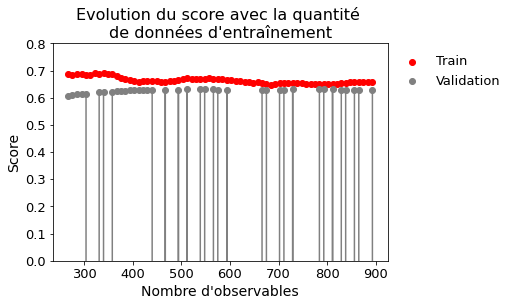

In [70]:
N, train_score, val_score = learning_curve(LinearRegression(), X_train_rob_c, y_train_c, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.ylim(0,0.8)

plt.show()

A l'inverse de ce que nous avons pu observer plus haut, ici la courbe de validation est fortement saccadée avec des valeurs pour la courbe de validation qui peuvent atteindre des valeurs conséquentes (proche de -10<sup>22</sup>). 

Il semblerait qu'il y ait des données (à priori provenant des variables catégorielles) qui influencent le modèle linéaire.

In [71]:
lin_reg_c = LinearRegression()
lin_reg_c.fit(X_train_c, y_train_c)

r2_lin_train_c = lin_reg_c.score(X_train_rob_c,y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_lin_train_c,5)}.")

r2_lin_test_c = lin_reg_c.score(X_test_rob_c,y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_lin_test_c,5)}.")

r2_comparatif_train_c.append(r2_lin_train_c)
r2_comparatif_test_c.append(r2_lin_test_c)

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.65684.
En considérant le jeu de test, le coefficient de corrélation R² vaut -7.454118919890559e+21.


Comme attendu avec la courbe d'apprentissage, nous obtenons un coefficient de corrélation très éloigné de 1. Nous allons poursuivre notre étude avec une régression polynomiale.

In [72]:
degrés = [2]

for deg in degrés:
    pol_reg = PolynomialFeatures(deg)
    pol_reg.fit(X_train_rob_c)
    
    X_poly = PolynomialFeatures(deg).fit_transform(X_train_rob_c)
    
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly,y_train_c)
    
    X_test_poly = PolynomialFeatures(deg).fit_transform(X_test_rob_c)
    
    
    r2_poly_train_c = lin_reg_poly.score(X_poly, y_train_c)
    r2_poly_test_c = lin_reg_poly.score(X_test_poly, y_test_c)
    r2_comparatif_train_c.append(r2_poly_train_c)
    r2_comparatif_test_c.append(r2_poly_test_c)
    print(f"Pour un polynôme de degrée {deg}, le coefficient de corrélation est de {round(r2_poly_test_c,6)}.")

Pour un polynôme de degrée 2, le coefficient de corrélation est de -4.138348741991419e+22.


Nous obtenons un coefficient de corrélation encore plus éloigné que celui obtenu avec la régression linéaire.
Nous continuons avec le modèle ElasticNet.
<a class="anchor" id="section_2_2_3"></a>
### Régression ElasticNet

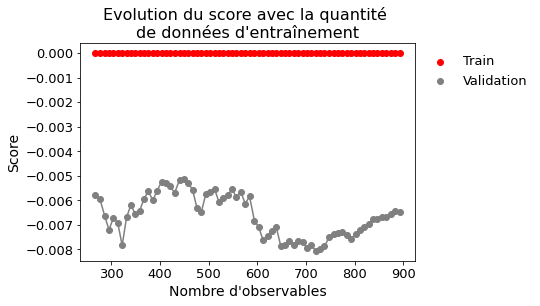

In [73]:
N, train_score, val_score = learning_curve(ElasticNet(), X_train_rob_c, y_train_c,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.show()

In [74]:
elastic_net = ElasticNet(random_state=rs)
elastic_net.fit(X_train_rob_c, y_train_c)

r2_elastic_net_train_c = elastic_net.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_elastic_net_train_c,5)}.")

r2_elastic_net_test_c = elastic_net.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_elastic_net_test_c,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.0.
En considérant le jeu de test, le coefficient de corrélation R² vaut -0.00116.


In [75]:
r2_comparatif_train_c.append(r2_elastic_net_train_c)
r2_comparatif_test_c.append(r2_elastic_net_test_c)

Le coefficient de corrélation pour le modéle ElasticNet est proche de 0. En utilisant les hyperparamètres par défaut, nous retrouvons le même résultat avec ou sans variables catégorielles.

Nous allons faire varier les hyperparamètres $\alpha$ et l1_ratio pour savoir si le coefficient de corrélation peut être optimisé.

In [76]:
n_alphas = 400
alphas = np.logspace(-2.95, 1, n_alphas)
alphas = sorted(np.append(alphas, [1]))
l1_ratio = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1]
param_grid = {"alpha" : alphas, "l1_ratio" : l1_ratio}

grid_elastic_c = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring="r2")
grid_elastic_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur score est de : {grid_elastic_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_elastic_c.best_params_}")

r2_grid_elastic_train_c = grid_elastic_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_elastic_train_c,5)}.")

r2_grid_elastic_test_c = grid_elastic_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_elastic_test_c,5)}.")

Le meilleur score est de : 0.63209.
Les meilleurs paramètres sont : {'alpha': 0.0017700885282272984, 'l1_ratio': 1}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64968.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.64224.


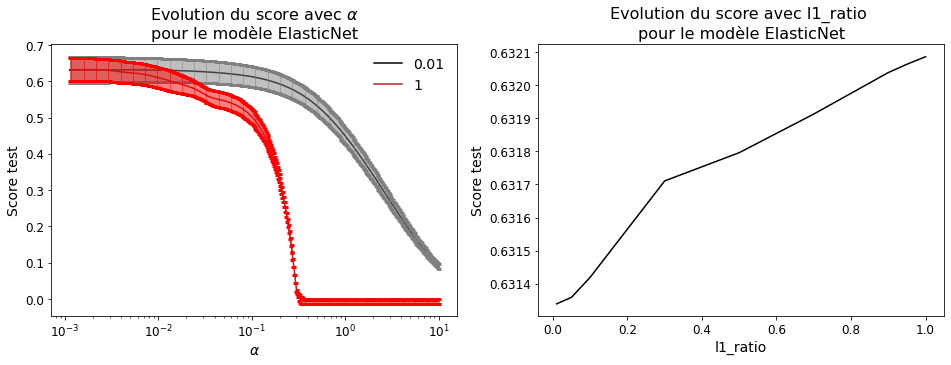

In [77]:
plt.figure(figsize=(16,5))

plt.subplot(121)    

y_e_n_001 = grid_elastic_c.cv_results_["mean_test_score"][0::9]
y_err_e_n_001 = grid_elastic_c.cv_results_["std_test_score"][0::9]

y_e_n_1 = grid_elastic_c.cv_results_["mean_test_score"][8::9]
y_err_e_n_1 = grid_elastic_c.cv_results_["std_test_score"][8::9]

plt.plot(alphas, y_e_n_001, color="black", label="0.01")
plt.errorbar(alphas, y_e_n_001, yerr = y_err_e_n_001, 
             fmt = 'none', capsize = 2, ecolor = 'gray', elinewidth = 0.5, capthick = 3)
plt.plot(alphas, y_e_n_1, color="firebrick", label="1")
plt.errorbar(alphas, y_e_n_1, yerr = y_err_e_n_1, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel(r"$\alpha$", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title(r"Evolution du score avec $\alpha$" "\npour le modèle ElasticNet", fontsize = 16)

plt.legend(frameon=False, fontsize=14)

plt.subplot(122)   

y_l1_ratio = []
for i in range (0,9,1):
    y_l1_ratio.append(grid_elastic_c.cv_results_["mean_test_score"][i::9].max())

plt.plot(l1_ratio, y_l1_ratio, color="black")

plt.xlabel("l1_ratio", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec l1_ratio \npour le modèle ElasticNet", fontsize = 16)

plt.show()

In [78]:
r2_comparatif_train_c.append(r2_grid_elastic_train_c)
r2_comparatif_test_c.append(r2_grid_elastic_test_c)

Avec le modèle ElasticNet, le coefficent de corrélation est de 0.642 ce qui est plus élevé que ceux obtenus précédemment. 
Les variables catégorielles semblent avoir un léger impact sur le coefficent de corrélation et donc sur la capacité du modèle à prédire un résultat.

Nous poursuivons notre étude avec les modèles ensemblistes.

<a class="anchor" id="section_2_3"></a>
## Régressions ensemblistes
<a class="anchor" id="section_2_3_1"></a>
### Régression RandomForest

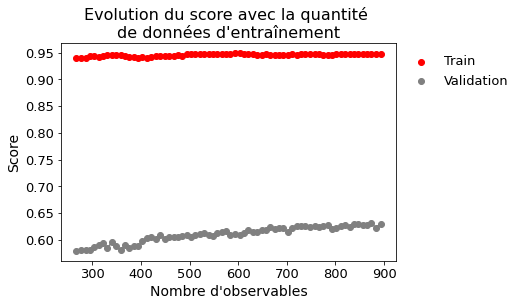

In [79]:
N, train_score, val_score = learning_curve(RandomForestRegressor(), X_train_rob_c, y_train_c, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.show()

In [80]:
random_forest = RandomForestRegressor(random_state=rs)
random_forest.fit(X_train_rob_c, y_train_c)

random_forest.predict(X_train_rob_c)

r2_random_forest_train = random_forest.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_random_forest_train,5)}.")

r2_random_forest_test = random_forest.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_random_forest_test,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.95044.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.6723.


In [81]:
r2_comparatif_train_c.append(r2_random_forest_train)
r2_comparatif_test_c.append(r2_random_forest_test)

Nous observons ici aussi un surapprentissage avec le RandomForest. En revanche, le coefficient de corrélation est supérieur à celui obtenu dans la première partie. 

Nous allons faire varier le nombre d'estimateurs et le nombre de variables à considérer. 

In [82]:
n_random_forest = 10
n_estimators = np.arange(50,170,n_random_forest)
max_features = ["sqrt", 1, 3, 5, 7, 9]

param_grid = {"n_estimators" : n_estimators, "max_features" : max_features }

grid_random_forest_c = GridSearchCV(RandomForestRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_random_forest_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur paramètre est : {grid_random_forest_c.best_params_}.")
print(f"Le meilleur score moyen est : {grid_random_forest_c.best_score_.round(5)}.")

r2_grid_randomF_train_c = grid_random_forest_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_randomF_train_c,5)}.")

r2_grid_randomF_test_c = grid_random_forest_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_randomF_test_c,5)}.")

Le meilleur paramètre est : {'max_features': 7, 'n_estimators': 140}.
Le meilleur score moyen est : 0.6453.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.95193.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.67627.


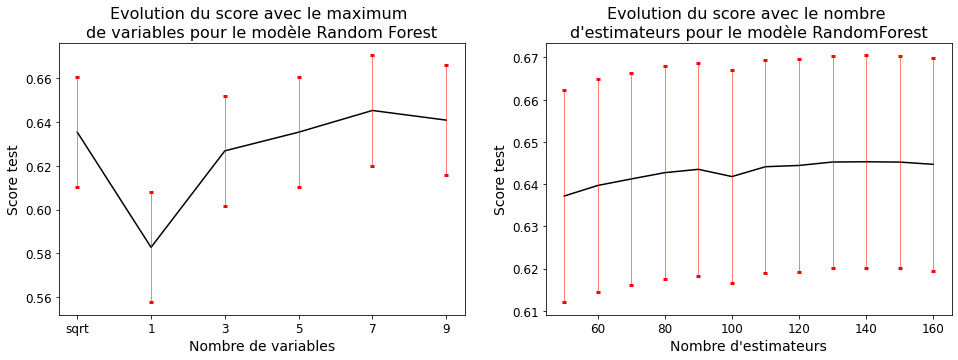

In [83]:
plt.figure(figsize=(16,5))

y_r_feat = []
y_err_r_feat = []

plt.subplot(121)
for i in range (0,72,12):
    max_score = grid_random_forest_c.cv_results_["mean_test_score"][i:i+12:].max()
    ind_max_score = np.argmax(max_score)
    y_r_feat.append(max_score)
    y_err_r_feat.append(grid_random_forest_c.cv_results_["std_test_score"][ind_max_score])

plt.plot(["sqrt", "1", "3", "5", "7", "9"], y_r_feat, color="black")
plt.errorbar(["sqrt", "1", "3", "5", "7", "9"], y_r_feat, yerr = y_err_r_feat, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)
plt.xlabel("Nombre de variables", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le maximum \nde variables pour le modèle Random Forest", fontsize = 16)


plt.subplot(122)

y_r_estim = []
y_err_r_estim = []

for i in range (0,12,1):
    max_score = grid_random_forest_c.cv_results_["mean_test_score"][i::12].max()
    ind_max_score = np.argmax(max_score)
    y_r_estim.append(max_score)
    y_err_r_estim.append(grid_random_forest_c.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_r_estim, color="black")
plt.errorbar(n_estimators, y_r_estim, yerr = y_err_r_estim, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle RandomForest", fontsize = 16)
plt.show()

In [84]:
r2_comparatif_train_c.append(r2_grid_randomF_train_c)
r2_comparatif_test_c.append(r2_grid_randomF_test_c)

Lorsque nous faisons varier le nombre de variables à considérer de 1 à 7, nous voyons que le score moyen augmente. Au-delà d'un nombre de variables à cnsidérer de 7, le score semble diminuer. 

Nous allons ensuite utiliser le modèle AdaBoost.
<a class="anchor" id="section_2_3_2"></a>
### Régression AdaBoost

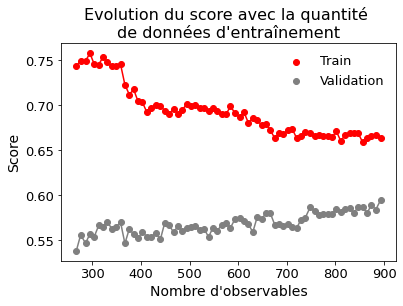

In [85]:
N, train_score, val_score = learning_curve(AdaBoostRegressor(), X_train_rob_c, y_train_c, 
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)


plt.show()

In [86]:
ada_c = AdaBoostRegressor(random_state=rs)
ada_c.fit(X_train_rob_c, y_train_c)

r2_ada_c_train_c = ada_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_ada_c_train_c,5)}.")

r2_ada_c_test_c = ada_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_ada_c_test_c,5)}.")


En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.66275.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.65993.


In [87]:
r2_comparatif_train_c.append(r2_ada_c_train_c)
r2_comparatif_test_c.append(r2_ada_c_test_c)

Utilisé avec les hyperparamètres par défaut, le modèle AdaBoost donne un coefficient de corrélation de 0.660, ce qui est légérement inférieur à celui obtenu avec le modèle RandomForest. De plus, nous voyons qu'il n'y a pas de surapprentissage avec ce modèle. 

Nous allons faire varier le nombre d'estimateurs et le taux d'apprentissage pour essayer d'optimiser le coefficient de corrélation.

In [88]:
n_ada = 10
n_estimators = np.arange(10,100,n_ada)
learning_rate = np.logspace(-3,0,20)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate" : learning_rate}

grid_ada_c = GridSearchCV(AdaBoostRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_ada_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur paramètre est : {grid_ada_c.best_params_}.")
print(f"Le meilleur score moyen est : {grid_ada_c.best_score_.round(5)}.")

r2_grid_ada_c_train = grid_ada_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_ada_c_train,5)}.")

r2_grid_ada_c_test = grid_ada_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_ada_c_test,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.1623776739188721, 'n_estimators': 80}.
Le meilleur score moyen est : 0.59973.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.65316.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.65324.


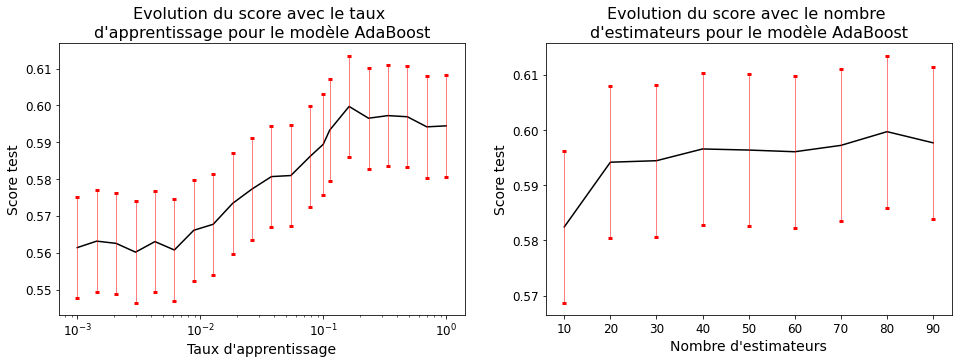

In [89]:
plt.figure(figsize=(16,5))
y_ada_learn = []
y_err_ada_learn = []

plt.subplot(121)
for i in range (0,189,9):
    max_score = grid_ada_c.cv_results_["mean_test_score"][i:i+9:].max()
    ind_max_score = np.argmax(max_score)
    y_ada_learn.append(max_score)
    y_err_ada_learn.append(grid_ada_c.cv_results_["std_test_score"][ind_max_score])

plt.plot(learning_rate, y_ada_learn, color="black")
plt.errorbar(learning_rate, y_ada_learn, yerr = y_err_ada_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le taux \nd'apprentissage pour le modèle AdaBoost", fontsize = 16)

plt.subplot(122)

y_ada_esti = []
y_err_ada_esti = []
for i in range (0,9,1):
    max_score = grid_ada_c.cv_results_["mean_test_score"][i::9].max()
    ind_max_score = np.argmax(max_score)
    y_ada_esti.append(max_score)
    y_err_ada_esti.append(grid_ada_c.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_ada_esti, color="black")
plt.errorbar(n_estimators, y_ada_esti, yerr = y_err_ada_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle AdaBoost", fontsize = 16)

plt.show()

In [90]:
r2_comparatif_train_c.append(r2_grid_ada_c_train)
r2_comparatif_test_c.append(r2_grid_ada_c_test)

En optimisant les hyperparamètres du modèle AdaBoost, le coefficient de corrélation reste similaire à celui obtenu avec les hyperparamètres par défaut.

Nous pouvons observer sur les graphiques ci-haut que le score moyen augmente avec un taux d'apprentissage compris entre 10<sup>-3</sup> et 10<sup>-1</sup>, puis reste stable lorsque le taux d'apprentissage est supérieur à 10<sup>-1</sup>.
En revanche, le score moyen ne varie pas beaucoup avec le nombre d'estimateur. 

<a class="anchor" id="section_2_3_3"></a>
### Régression Gradient Boosting

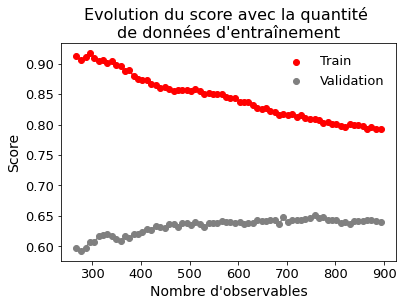

In [91]:
N, train_score, val_score = learning_curve(GradientBoostingRegressor(), X_train_rob_c, y_train_c,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)


plt.show()

In [92]:
grad_boost_c = GradientBoostingRegressor(random_state=rs)
grad_boost_c.fit(X_train_rob_c, y_train_c)

grad_boost_c.predict(X_train_rob_c)

r2_grad_boost_train_c = grad_boost_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grad_boost_train_c,5)}.")

r2_grad_boost_test_c = grad_boost_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grad_boost_test_c,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.7739.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.67528.


In [93]:
r2_comparatif_train_c.append(r2_grad_boost_train_c)
r2_comparatif_test_c.append(r2_grad_boost_test_c)

Nous observons avec le modèle Gradient Boosting qu'il y a un surapprentissage (comme dans la première partie) et le coefficient de corrélation est parmi les meilleurs obtenus dans cette seconde partie.

Nous allons essayer d'optimiser le coefficient de corrélation en modifiant le taux d'apprentissage et le nombre d'estimateurs.

In [94]:
n_grad = 5
n_estimators = np.arange(80,160,n_grad)
learning_rate = np.logspace(-2,0,15)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate" : learning_rate}

grid_grad_c = GridSearchCV(GradientBoostingRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_grad_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur paramètre est : {grid_grad_c.best_params_}.")
print(f"Le meilleur score moyen est : {grid_grad_c.best_score_.round(5)}.")

r2_grid_grad_train_c = grid_grad_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_grad_train_c,5)}.")

r2_grid_grad_test_c = grid_grad_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_grad_test_c,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.1, 'n_estimators': 120}.
Le meilleur score moyen est : 0.64555.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.78587.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.67736.


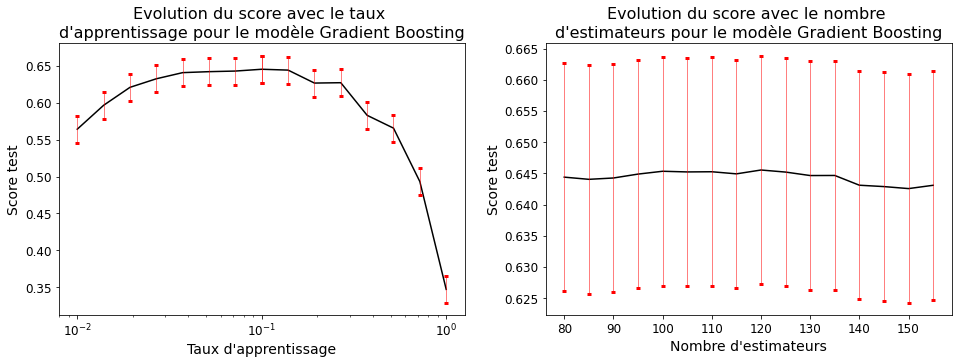

In [95]:
plt.figure(figsize=(16,5))
y_grad_learn = []
y_err_grad_learn = []

plt.subplot(121)
for i in range (0,256,16):
    max_score = grid_grad_c.cv_results_["mean_test_score"][i:i+16:].max()
    ind_max_score = np.argmax(max_score)
    y_grad_learn.append(max_score)
    y_err_grad_learn.append(grid_grad_c.cv_results_["std_test_score"][ind_max_score])

plt.plot(learning_rate, y_grad_learn, color="black")
plt.errorbar(learning_rate, y_grad_learn, yerr = y_err_grad_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)
plt.xscale("log")
plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le taux \nd'apprentissage pour le modèle Gradient Boosting", fontsize = 16)
plt.subplot(122)

y_grad_esti = []
y_err_grad_esti = []
for i in range (0,16,1):
    max_score = grid_grad_c.cv_results_["mean_test_score"][i::16].max()
    ind_max_score = np.argmax(max_score)
    y_grad_esti.append(max_score)
    y_err_grad_esti.append(grid_grad_c.cv_results_["std_test_score"][ind_max_score])
    
plt.plot(n_estimators, y_grad_esti, color="black")
plt.errorbar(n_estimators, y_grad_esti, yerr = y_err_grad_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle Gradient Boosting", fontsize = 16)
plt.show()

In [96]:
r2_comparatif_train_c.append(r2_grid_grad_train_c)
r2_comparatif_test_c.append(r2_grid_grad_test_c)

En optimisant les hyperparamètres, nous arrivons à avoir un coefficient de corrélation légérement meilleur que celui obtenu avec les hyperparamètres par défaut.

Nous pouvons observer sur le graphique ci-haut que le score moyen du test varie beaucoup avec le taux d'apprentissage et peu avec le nombre d'estimateur. 

Nous allons maintenant considérer le modèle KNN.

<a class="anchor" id="section_2_4"></a>
## Régression KNN

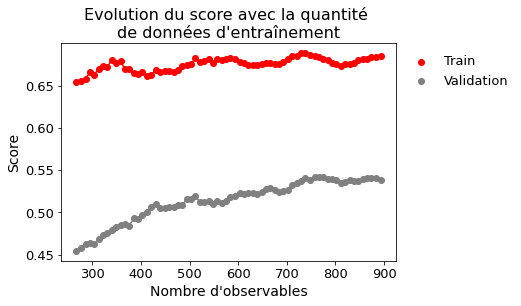

In [97]:
N, train_score, val_score = learning_curve(KNeighborsRegressor(), X_train_rob_c, y_train_c,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.show()

In [98]:
knn_c = KNeighborsRegressor()
knn_c.fit(X_train_rob_c, y_train_c)

r2_knn_train_c = knn_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_knn_train_c,5)}.")

r2_knn_test_c = knn_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_knn_test_c,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.68788.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.55144.


In [99]:
r2_comparatif_train_c.append(r2_knn_train_c)
r2_comparatif_test_c.append(r2_knn_test_c)

Avec le modèle KNN, où le nombre de voisins par défaut est de 3, nous obtenons un coefficient de corrélation de 0.55. Nous allons faire varier le nombre de voisins ainsi que la métrique.

In [100]:
voisins = np.arange(1,41,1)
param_grid = {'n_neighbors': voisins,  "metric":["l1","l2"]}
grid_knn_c = model_selection.GridSearchCV(KNeighborsRegressor(),
                                        param_grid,
                                        cv=5, 
                                        scoring="r2")
grid_knn_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur score est de : {grid_knn_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_knn_c.best_params_}")

r2_grid_knn_train_c = grid_knn_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_knn_train_c,5)}.")

r2_grid_knn_test_c = grid_knn_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_knn_test_c,5)}.")

Le meilleur score est de : 0.54401.
Les meilleurs paramètres sont : {'metric': 'l2', 'n_neighbors': 12}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.6155.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.53674.


In [101]:
r2_comparatif_train_c.append(r2_grid_knn_train_c)
r2_comparatif_test_c.append(r2_grid_knn_test_c)

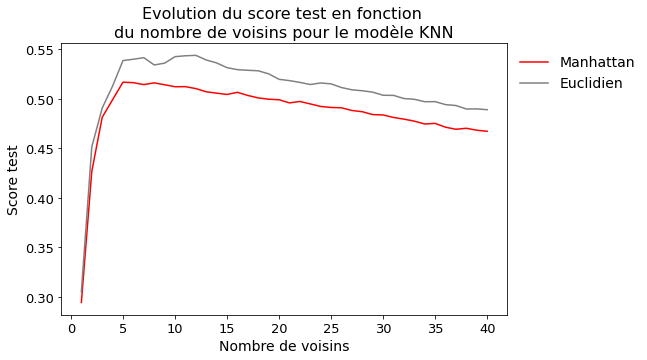

In [102]:
y_1 = grid_knn_c.cv_results_["mean_test_score"][0:40]
y_2 = grid_knn_c.cv_results_["mean_test_score"][40:]
y_err_1 = grid_knn_c.cv_results_["std_test_score"][0:40]
y_err_2 = grid_knn_c.cv_results_["std_test_score"][40:]

plt.figure(figsize=(8,5))

plt.plot(voisins, y_1, label="Manhattan", color="red")
plt.plot(voisins, y_2, label="Euclidien", color="gray")


plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score test en fonction \ndu nombre de voisins pour le modèle KNN", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

Le coefficient de corrélation pour le modèle KNN a pu être optimisé en ajustant le nombre de voisins et la métrique.
Ici, le nombre de voisins idéal est de 12 et la métrique à choisir est la distance euclidienne.

Si nous regardons l'évolution du score moyen en fonction du nombre de voisins pour la distance euclidienne, nous pouvons voir qu'entre 1 et 12 voisins, le score moyen augmente. Ensuite, au-delà de 12 voisins, le score moyen diminue. Cette tendance est similaire pour la distance de Manhattan mais l'augmentation du score s'arrête pour un nombre de voisins de 5.

En revanche, le score moyen reste toujours en dessous de ceux trouvés pour les modèles ensemblistes.

Nous allons tester le modèle SVR.

<a class="anchor" id="section_2_5"></a>
## Regression SVR

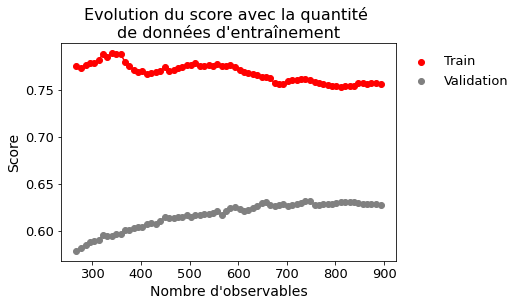

In [103]:
N, train_score, val_score = learning_curve(SVR(), X_train_rob_c, y_train_c,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1) , fontsize = 13)

plt.show()

In [104]:
svr_c = SVR()
svr_c.fit(X_train_rob_c, y_train)

r2_svr_train_c = svr_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_svr_train_c,5)}.")

r2_svr_test_c = svr_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_svr_test_c,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.75237.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.6332.


In [105]:
r2_comparatif_train_c.append(r2_svr_train_c)
r2_comparatif_test_c.append(r2_svr_test_c)

Avec le modèle SVR, le coefficient de corrélation est de 0.633. Il est très proche de celui obtenu avec le modèle ElasticNet. Nous allons maintenant faire varier certains hyperparamètres : C, $\epsilon$ et le kernel.
Nous allons commencer par faire varier le kernel.

In [106]:
degree = [2, 3, 4]
kernel = ["linear", "poly", "rbf"]
param_grid = {"kernel" : kernel, "degree" : degree}
grid_svr_k_c = model_selection.GridSearchCV(SVR(kernel="poly"),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr_k_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur score est de : {grid_svr_k_c.best_score_.round(5)}.")
print(f"Le meilleurs paramètre est : {grid_svr_k_c.best_params_}")

r2_train_grid_svr_k_c = grid_svr_k_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_train_grid_svr_k_c,5)}.")

r2_test_grid_svr_k_c = grid_svr_k_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_test_grid_svr_k_c,5)}.")

Le meilleur score est de : 0.63127.
Le meilleurs paramètre est : {'degree': 2, 'kernel': 'linear'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.6513.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.61937.


In [107]:
kern_lin = grid_svr_k_c.cv_results_["mean_test_score"][0]

deg_2 = grid_svr_k_c.cv_results_["mean_test_score"][1]
deg_3 = grid_svr_k_c.cv_results_["mean_test_score"][4]
deg_4 = grid_svr_k_c.cv_results_["mean_test_score"][7]

kern_rbf = grid_svr_k_c.cv_results_["mean_test_score"][2]

print(f"Pour le kernel linéaire, le score est de : {round(kern_lin,5)}.""\n")
print(f"Pour le kernel rbf, le score est de : {round(kern_rbf,5)}.""\n")
print(f"Pour un polynôme de degré 2, le score est de : {round(deg_2,5)}.""\n")
print(f"Pour un polynôme de degré 3, le score est de : {round(deg_3,5)}.""\n")
print(f"Pour un polynôme de degré 4, le score est de : {round(deg_4,5)}.")

Pour le kernel linéaire, le score est de : 0.63127.

Pour le kernel rbf, le score est de : 0.62747.

Pour un polynôme de degré 2, le score est de : 0.61548.

Pour un polynôme de degré 3, le score est de : 0.56929.

Pour un polynôme de degré 4, le score est de : 0.47526.


Nous pouvons voir que le kernel linéaire, rbf et polynomiale de degré 2 ont des scores moyens très proches. 

Nous allons garder les trois kernels et faire varier l'hyperparamètre C. 

In [108]:
c = np.logspace(-3,1.5,100)
c = sorted(np.append(c, [1]))
kernel =["linear", "poly", "rbf"]
param_grid = {'C': c, "kernel" : kernel}
grid_svr_C_c = model_selection.GridSearchCV(SVR(degree=2),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr_C_c.fit(X_train_rob_c, y_train_c)
print(f"Le meilleur score est de : {grid_svr_C_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_C_c.best_params_}")

r2_train_grid_svr_C_c = grid_svr_C_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_train_grid_svr_C_c,5)}.")

r2_test_grid_svr_C_c = grid_svr_C_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_test_grid_svr_C_c,5)}.")

Le meilleur score est de : 0.63195.
Les meilleurs paramètres sont : {'C': 0.16876124757881486, 'kernel': 'linear'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.65113.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.62373.


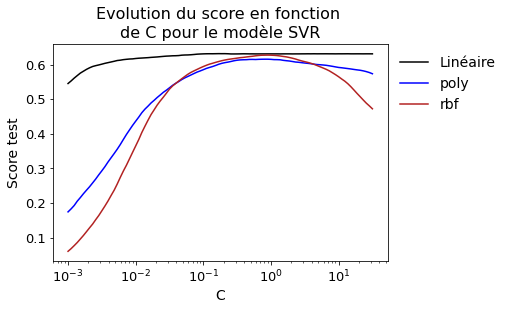

In [109]:
y_svr_lin = grid_svr_C_c.cv_results_["mean_test_score"][0::3]
y_svr_poly = grid_svr_C_c.cv_results_["mean_test_score"][1::3]
y_svr_rbf = grid_svr_C_c.cv_results_["mean_test_score"][2::3]


plt.xscale("log")
plt.plot(c, y_svr_lin, label = "Linéaire", color="black")
plt.plot(c, y_svr_poly, label = "poly", color="blue")
plt.plot(c, y_svr_rbf, label = "rbf", color="firebrick")
plt.xlabel("C", fontsize=14)
plt.ylabel("Score test", fontsize=14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Evolution du score en fonction \nde C pour le modèle SVR", fontsize=16)
plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

Lorsque l'hyperparamètre C augmente, le score moyen augmente pour les différents kernels. 
Pour le kernel linéaire, le score moyen reste stable à partir de C = 10<sup>-3</sup>.
Pour les kernels polynomiale et rbf, le score moyen augmente jusqu'à atteindre un maximum pour C compris entre 0.1 et 1 puis diminue.

Nous venons de déterminer quel était le meilleur couple kernel/C. Nous allons remplacer l'hyperparamètre C par $\epsilon$.

In [110]:
epsilon = np.logspace(-1,1,200)
epsilon = sorted(np.append(epsilon, [0.1]))
kernel = ["linear", "poly", "rbf"]
param_grid = {'epsilon': epsilon, "kernel" : kernel}
grid_svr_epsilon_c = model_selection.GridSearchCV(SVR(degree=2),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr_epsilon_c.fit(X_train_rob_c, y_train_c)

print(f"Le meilleur score est de : {grid_svr_epsilon_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_epsilon_c.best_params_}")

r2_train_epsilon_c = grid_svr_epsilon_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_train_epsilon_c,5)}.")

r2_test_epsilon_c = grid_svr_epsilon_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_test_epsilon_c,5)}.")

Le meilleur score est de : 0.63138.
Les meilleurs paramètres sont : {'epsilon': 0.10473708979594494, 'kernel': 'linear'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.65138.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.61837.


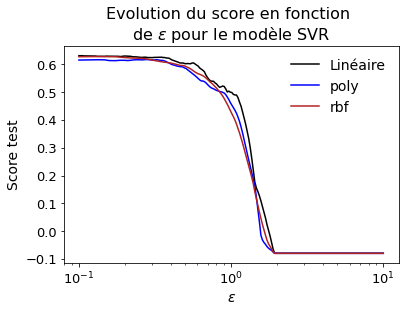

In [111]:
y_svr_lin = grid_svr_epsilon_c.cv_results_["mean_test_score"][0::3]
y_svr_poly = grid_svr_epsilon_c.cv_results_["mean_test_score"][1::3]
y_svr_rbf = grid_svr_epsilon_c.cv_results_["mean_test_score"][2::3]


plt.xscale("log")
plt.plot(epsilon, y_svr_lin, label = "Linéaire", color="black")
plt.plot(epsilon, y_svr_poly, label = "poly", color="blue")
plt.plot(epsilon, y_svr_rbf, label = "rbf", color="firebrick")
plt.xlabel(r"$\epsilon$", fontsize=14)
plt.ylabel("Score test", fontsize=14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Evolution du score en fonction \nde " r"$\epsilon$ pour le modèle SVR", fontsize=16)
plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

En balayant l'hyperparamètre $\epsilon$, nous pouvons voir que le score moyen du test est le plus elevé pour une valeur de $\epsilon$ inférieur à une valeur proche de 0.5. Ensuite, le score moyen du test diminue plutôt rapidement pour une valeur de $\epsilon$ comprise entre 0.5 et 5. Enfin, le score moyen teste stable et proche de 0. 

Nous allons poursuivre notre étude en considérant le kernel linéaire, C et $\epsilon$. 

In [112]:
epsilon = np.logspace(-2,1,50)
kernel = ["linear"]
c = np.logspace(-3,1,20)
c = sorted(np.append(c, [1]))
epsilon = sorted(np.append(epsilon, [0.1]))
param_grid = {'epsilon': epsilon, "kernel" : kernel, "C": c}
grid_svr_c = model_selection.GridSearchCV(SVR(degree=2),
                                        param_grid,
                                        cv=5, scoring="r2")

grid_svr_c.fit(X_train_rob_c, y_train)

print(f"Le meilleur score est de : {grid_svr_c.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_c.best_params_}")

r2_grid_svr_train_c = grid_svr_c.score(X_train_rob_c, y_train_c)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train_c,5)}.")

r2_grid_svr_test_c = grid_svr_c.score(X_test_rob_c, y_test_c)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test_c,5)}.")

Le meilleur score est de : 0.63432.
Les meilleurs paramètres sont : {'C': 0.20691380811147903, 'epsilon': 0.054286754393238594, 'kernel': 'linear'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.64962.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.60587.


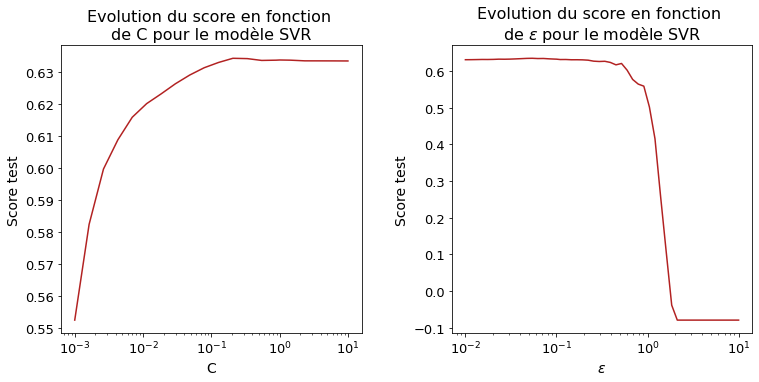

In [113]:
y_rbf_c = []

for i in range (0,1071,51):
    y_rbf_c.append(grid_svr_c.cv_results_["mean_test_score"][i:i+51].max())

plt.figure(figsize=(12,5))    

plt.subplot(121)

plt.plot(c, y_rbf_c, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel("C", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde C pour le modèle SVR", fontsize=16)

plt.subplot(122)

y_rbf_eps = []

for i in range (0,51,1):
    y_rbf_eps.append(grid_svr_c.cv_results_["mean_test_score"][i::51].max())
    
plt.subplot(122)

plt.plot(epsilon, y_rbf_eps, label = "rbf", color="firebrick")

plt.xscale("log")

plt.xlabel(r"$\epsilon$", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde" r" $\epsilon$ pour le modèle SVR", fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.0)

plt.show()

In [114]:
r2_comparatif_train_c.append(r2_grid_svr_train_c)
r2_comparatif_test_c.append(r2_grid_svr_test_c)

En utilisant les hyperparamètres optimisés, le coefficient de corrélation avec le modèle SVR est d'environ 0.61. 

Nous allons maintenant faire un premier bilan des résultats obtenus dans cette partie.

<a class="anchor" id="section_2_6"></a>
## Bilan

In [115]:
erreur_1 = np.argmax(grid_elastic_c.cv_results_["mean_test_score"])
err_e_n_g = (grid_elastic_c.cv_results_["std_test_score"][erreur_1])

erreur_2 = np.argmax(grid_random_forest_c.cv_results_["mean_test_score"])
err_r_f_g = (grid_random_forest_c.cv_results_["std_test_score"][erreur_2])

erreur_3 = np.argmax(grid_ada_c.cv_results_["mean_test_score"])
err_ada_g = (grid_ada_c.cv_results_["std_test_score"][erreur_3])

erreur_4 = np.argmax(grid_grad_c.cv_results_["mean_test_score"])
err_grad_g = (grid_grad_c.cv_results_["std_test_score"][erreur_4])

erreur_5 = np.argmax(grid_knn_c.cv_results_["mean_test_score"])
err_knn_g = (grid_knn_c.cv_results_["std_test_score"][erreur_5])

erreur_6 = np.argmax(grid_svr_c.cv_results_["mean_test_score"])
err_svr_g = (grid_svr_c.cv_results_["std_test_score"][erreur_6])

err_comp_c = [0, 0, 0, err_e_n_g, err_r_f_g, err_ada_g, err_grad_g, err_knn_g, err_svr_g]

modele = ["Dummy", "Linéaire", "Poly (2)", "ElasticN", "RandomF", "AdaBoost", "Gradient", "KNN", "SVR"]
r2_test_c = r2_comparatif_test_c
del r2_test_c[3::2]


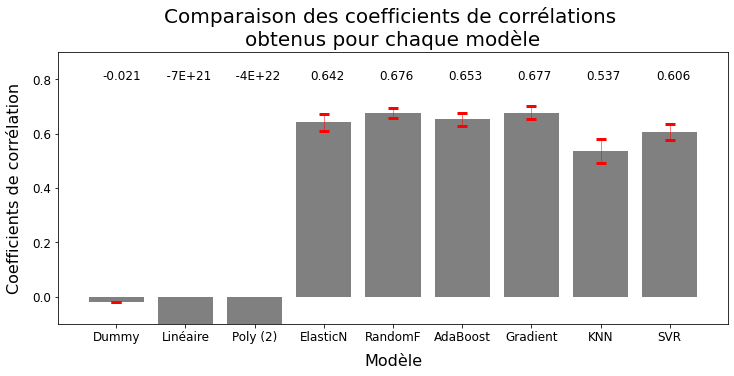

In [116]:
plt.figure(figsize=(12,5))

plt.bar(height = r2_test_c, x = modele, color="gray")
plt.errorbar(modele, r2_test_c, err_comp_c, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)
for i in range (0, len(r2_test_c),1): 
    if np.abs(r2_test_c[i])<1:
        plt.text(i-0.2, 0.8, f"{round(r2_test_c[i],3)}",fontsize=12)
    else:
        plt.text(i-0.5, 0.8, format(r2_test_c[i], "10.0E"),fontsize=12)

plt.ylim(-0.1,0.9)

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Coefficients de corrélation", fontsize=16, labelpad = 10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Comparaison des coefficients de corrélations \nobtenus pour chaque modèle", fontsize=20)
plt.show()

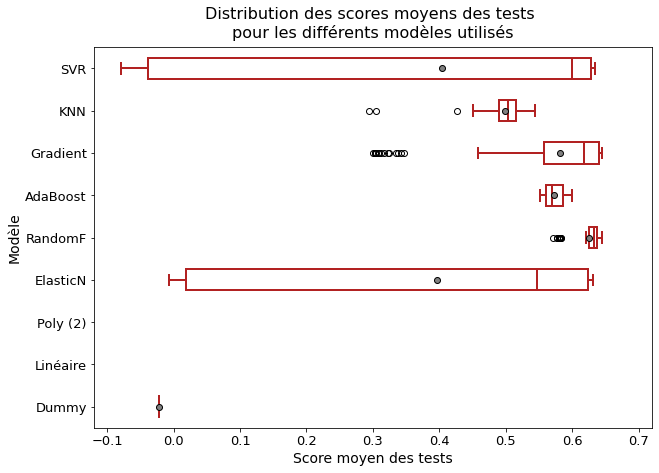

In [117]:
dist_mean_score = []
dist_mean_score.append(r2_dummy_test_c)
dist_mean_score.append(r2_lin_test_c)
dist_mean_score.append(r2_poly_test_c)
dist_mean_score.append(grid_elastic_c.cv_results_["mean_test_score"])
dist_mean_score.append(grid_random_forest_c.cv_results_["mean_test_score"])
dist_mean_score.append(grid_ada_c.cv_results_["mean_test_score"])
dist_mean_score.append(grid_grad_c.cv_results_["mean_test_score"])
dist_mean_score.append(grid_knn_c.cv_results_["mean_test_score"] )
dist_mean_score.append(grid_svr_c.cv_results_["mean_test_score"])

plt.figure(figsize=(10,7))

plt.boxplot(dist_mean_score, vert=False, showfliers=True, patch_artist=True, 
            capprops=dict(color="firebrick", linewidth=2),
            boxprops=dict(facecolor="white", color="firebrick", linewidth=2),
            whiskerprops=dict(color="firebrick", linewidth=2),
            medianprops=dict(color="firebrick", linewidth=2),
            showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'gray'})

plt.xlim(-0.12,0.72)

plt.xlabel("Score moyen des tests", fontsize=14)
plt.ylabel("Modèle", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(np.arange(1,10), modele, fontsize=13)

plt.title("Distribution des scores moyens des tests \npour les différents modèles utilisés", fontsize=16, pad=10)
plt.show()


Globalement, les modèles ensemblistes, SVR et ElasticNet donnent des coefficients de corrélation similaire. En revanche, le modèle KNN donne des coefficients de corrélation légérement inférieur à ceux obtenus avec les méthodes ensemblistes notamment. Il est à noter que les modèles linéaires et polynomiales donne des résultats très mauvais.

Comme dans la première partie, seuls  les modèles RandomForest et AdaBoost présentent une faible dispersion en scores moyens. Les modèles SVR et ElasticNet sont les modèles ayant la plus grande dispersion de scores moyens.

In [118]:
r2_train_c = r2_comparatif_train_c
del r2_train_c[3::2]

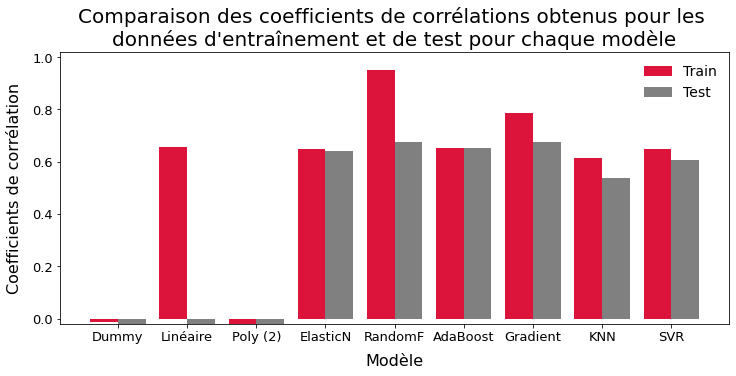

In [119]:
plt.figure(figsize=(12,5))

x_axis = np.arange(len(modele))
plt.bar(height = r2_train_c, x = x_axis-0.2, width=0.4, color = "crimson", label="Train")
plt.bar(height = r2_test_c, x = x_axis+0.2, width=0.4, color = "gray", label="Test")

plt.ylim(-0.02,1.02)

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Coefficients de corrélation", fontsize=16, labelpad = 10)

plt.xticks(x_axis, modele, fontsize=13)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=13)
plt.legend(bbox_to_anchor =(1,1), frameon=False, fontsize=14)

plt.title("Comparaison des coefficients de corrélations obtenus pour les \ndonnées d'entraînement et de test pour chaque modèle", 
          fontsize=20)
plt.show()

Pour terminer ce bilan, nous avons regardé les comportement des différents modèles sur les données d'entraînement et de test. 
Les modèles RandomForest et Gradient Boosting sont des modèles qui surapprennent à l'inverse notamment des modèles ElasticNet et AdaBoost.

<a class="anchor" id="chapter3"></a>
# Influence de l'ENERGYSTARScore

Nous venons de déterminer le modèle permettant de prédire au mieux la consommation d'énergie des bâtiments. Nous allons voir si le fait d'ajouter l'ENERGYSTARScore permet d'avoir un meilleur coefficient de corrélation pour les différents modèles testés.

Nous allons dans un premier temps isoler les données où l'ENERGYSTARScore est non nul, puis nous allons procéder de la même manière que précedemment en commencant par des régressions linéaires.

<a class="anchor" id="section_3_1"></a>
## Régressions linéaires

In [120]:
data_ESS = data_enc.loc[data_enc["ENERGYSTARScore"].notnull()]

display(data_ESS.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 1592
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Quartier_compact_Centre                        1069 non-null   float64
 1   Quartier_compact_Nord                          1069 non-null   float64
 2   Quartier_compact_Sud                           1069 non-null   float64
 3   Usage_bâtiments_Autres                         1069 non-null   float64
 4   Usage_bâtiments_Bureaux                        1069 non-null   float64
 5   Usage_bâtiments_Ecoles                         1069 non-null   float64
 6   Usage_bâtiments_Entrepôts                      1069 non-null   float64
 7   Usage_bâtiments_Sciences                       1069 non-null   float64
 8   Source_energie_Elec                            1069 non-null   float64
 9   Source_energie_Elec_Eau                        1069 

None

In [121]:
X_ess = data_ESS[data_ESS.columns[0:34]].values
y_ess = data_ESS["Energie"].values

X_train, X_test, y_train_ess, y_test_ess = model_selection.train_test_split(X_ess, y_ess, test_size=0.3, random_state=rs)

rob_scale = preprocessing.RobustScaler()
X_train_ess = X_train
X_train_ess[:,22:] = rob_scale.fit_transform(X_train_ess[:,22:])

X_test_ess = X_test
X_test_ess[:,22:] = rob_scale.fit_transform(X_test_ess[:,22:])

<a class="anchor" id="section_3_1_1"></a>
### Régression Dummy

In [122]:
dummy_ess = DummyRegressor()
dummy_ess.fit(X_train_ess, y_train_ess)

r2_dummy_train_ess = dummy_ess.score(X_train_ess,y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_dummy_train_ess,5)}.")

r2_dummy_test_ess = dummy_ess.score(X_test_ess,y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_dummy_test_ess,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.0.
En considérant le jeu de test, le coefficient de corrélation R² vaut -0.00573.


In [123]:
r2_comparatif_train_ess = []
r2_comparatif_test_ess = []

r2_comparatif_train_ess.append(r2_dummy_train_ess)
r2_comparatif_test_ess.append(r2_dummy_test_ess)

Comme précedemment, le coefficient de corrélation pour la régression Dummy est proche de 0.

Nous allons étudier le modèle linéaire.
<a class="anchor" id="section_3_1_2"></a>
### Régression linéaire et polynomiale

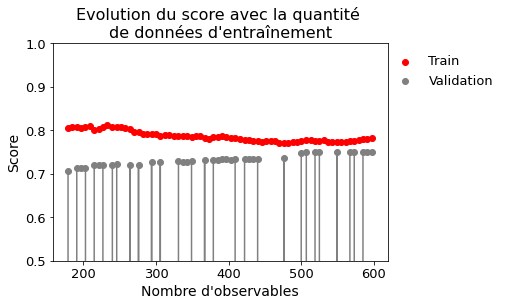

In [124]:
N, train_score, val_score = learning_curve(LinearRegression(), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score avec la quantité \nde données d'entraînement", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1) , fontsize = 13)

plt.ylim(0.5,1)

plt.show()

In [125]:
linear_ess = LinearRegression()
linear_ess.fit(X_train_ess, y_train_ess)

r2_linear_train_ess = linear_ess.score(X_train_ess,y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_linear_train_ess,5)}.")

r2_linear_test_ess = linear_ess.score(X_test_ess,y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_linear_test_ess,5)}.")

En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.77909.
En considérant le jeu de test, le coefficient de corrélation R² vaut -48953.28698.


In [126]:
r2_comparatif_train_ess.append(r2_linear_train_ess)
r2_comparatif_test_ess.append(r2_linear_test_ess)

Nous observons sur la courbe de validation qu'il y a des scores moyens qui sont très petits (proche de -10<sup>24</sup>). Nous obtenons en conséquence un coefficient de corrélation très éloigné de 0, comme dans la partie précedente.

Nous allons étudier la régression polynomiale, qui devrait normalement nous donner un coefficient de corréaltion très éloigné de 0.

In [127]:
degrés = [2]

for deg in degrés:
    pol_reg = PolynomialFeatures(degree=deg)
    pol_reg.fit(X_train_ess)
    
    X_poly = pol_reg.transform(X_train_ess)
    
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly,y_train_ess)
    
    X_test_poly = pol_reg.transform(X_test_ess)
    r2_poly_train_ess = lin_reg_poly.score(X_poly, y_train_ess)
    r2_poly_test_ess = lin_reg_poly.score(X_test_poly, y_test_ess)
    r2_comparatif_train_ess.append(r2_poly_train_ess)
    r2_comparatif_test_ess.append(r2_poly_test_ess)
    print(f"Pour un polynôme de degré {deg}, le coefficient de corrélation est de {round(r2_poly_test_ess,6)}.")

Pour un polynôme de degré 2, le coefficient de corrélation est de -6.908932253812049e+22.


Le coefficient de corrélation pour une régression polynomiale est négatif et très éloigné de 0 (-7.10<sup>22</sup>). 

Nous allons maintenant tester le modèle ElasticNet en faisant varier les mêmes hyperparamètres que dans les parties précédentes 
<a class="anchor" id="section_3_1_3"></a>
### Régression ElasticNet

In [128]:
n_alphas = 400
alphas = np.logspace(-2, 1.5, n_alphas)
alphas = sorted(np.append(alphas, [1]))
l1_ratio = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1]
param_grid = {"alpha" : alphas, "l1_ratio" : l1_ratio}

grid_elastic_net_ess = GridSearchCV(ElasticNet(random_state=rs), param_grid, cv=5, scoring="r2")
grid_elastic_net_ess.fit(X_train_ess, y_train_ess)

print(f"Les meilleurs paramètres sont : {grid_elastic_net_ess.best_params_}.")
print(f"Le meilleur score moyen est : {grid_elastic_net_ess.best_score_.round(5)}.")

r2_grid_elastic_net_train_ess = grid_elastic_net_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_elastic_net_train_ess,5)}.")

r2_grid_elastic_net_test_ess = grid_elastic_net_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_elastic_net_test_ess,5)}.")

Les meilleurs paramètres sont : {'alpha': 0.01, 'l1_ratio': 0.01}.
Le meilleur score moyen est : 0.74858.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.77139.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.74436.


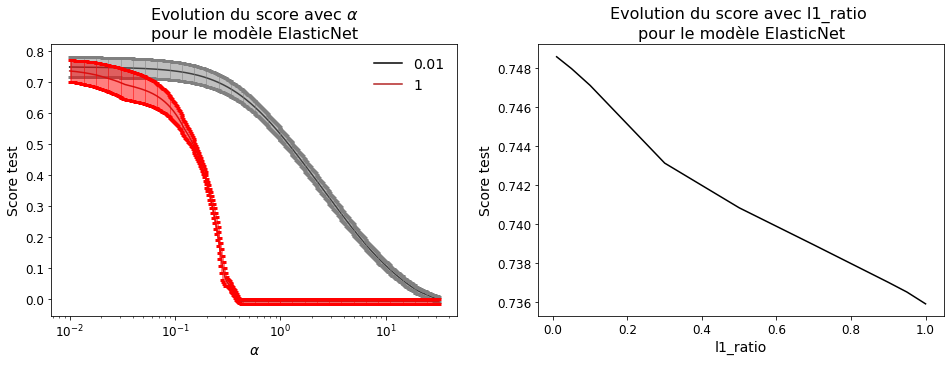

In [129]:
plt.figure(figsize=(16,5))

plt.subplot(121)    

y_e_n_001 = grid_elastic_net_ess.cv_results_["mean_test_score"][0::9]
y_err_e_n_001 = grid_elastic_net_ess.cv_results_["std_test_score"][0::9]

y_e_n_1 = grid_elastic_net_ess.cv_results_["mean_test_score"][8::9]
y_err_e_n_1 = grid_elastic_net_ess.cv_results_["std_test_score"][8::9]

plt.plot(alphas, y_e_n_001, color="black", label="0.01")
plt.errorbar(alphas, y_e_n_001, yerr = y_err_e_n_001, 
             fmt = 'none', capsize = 2, ecolor = 'gray', elinewidth = 0.5, capthick = 3)
plt.plot(alphas, y_e_n_1, color="firebrick", label="1")
plt.errorbar(alphas, y_e_n_1, yerr = y_err_e_n_1, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel(r"$\alpha$", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title(r"Evolution du score avec $\alpha$" "\npour le modèle ElasticNet", fontsize = 16)

plt.legend(frameon=False, fontsize=14)

plt.subplot(122)   

y_l1_ratio = []
for i in range (0,9,1):
    y_l1_ratio.append(grid_elastic_net_ess.cv_results_["mean_test_score"][i::9].max())

plt.plot(l1_ratio, y_l1_ratio, color="black")

plt.xlabel("l1_ratio", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec l1_ratio \npour le modèle ElasticNet", fontsize = 16)

plt.show()

In [130]:
r2_comparatif_train_ess.append(r2_grid_elastic_net_train_ess)
r2_comparatif_test_ess.append(r2_grid_elastic_net_test_ess)

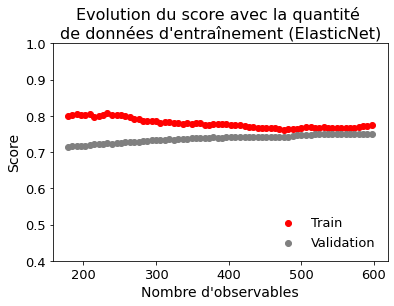

In [131]:
N, train_score, val_score = learning_curve(ElasticNet(alpha = 0.01, l1_ratio = 0.01), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité \nde données d'entraînement (ElasticNet)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

Lorsque nous optimisons les hyperparamètres, nous obtenons un coefficient de corrélation de 0.744. Nous pouvons affirmer que l'ajout de l'ENERGYSTARScore permet d'améliorer le coefficient de corrélation et donc de mieux prédire la consommation d'énergie.

Nous pouvons aussi noter que la meilleure valeur de $\alpha$ est de 0.01 et le meilleur l1_ratio est de 0.01. Cependant ces résultats sont différents de ceux obtenus dans la partie précédente où la valeur de $\alpha$ optimale était d'environ 0.001 et le meilleur l1_ratio était de 1.

Nous allons étudier les modèles ensemblistes et voir si la tendance est la même ou non.

<a class="anchor" id="section_3_2"></a>
## Régressions ensemblistes
<a class="anchor" id="section_3_2_1"></a>
### Régression Random Forest

In [132]:
n_random_forest = 10
n_estimators = np.arange(50,150,n_random_forest)
max_features = ["sqrt", 1, 20, 21, 22, 23, 24, 25]
param_grid = {"n_estimators" : n_estimators, "max_features" : max_features}


grid_random_forest_ess = GridSearchCV(RandomForestRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_random_forest_ess.fit(X_train_ess, y_train_ess)

print(f"Le meilleur paramètre est : {grid_random_forest_ess.best_params_}.")
print(f"Le meilleur score moyen est : {grid_random_forest_ess.best_score_.round(5)}.")

r2_grid_randomF_train_ess = grid_random_forest_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_randomF_train_ess,5)}.")

r2_grid_randomF_test_ess = grid_random_forest_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_randomF_test_ess,5)}.")

Le meilleur paramètre est : {'max_features': 22, 'n_estimators': 130}.
Le meilleur score moyen est : 0.784.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.9712.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.74649.


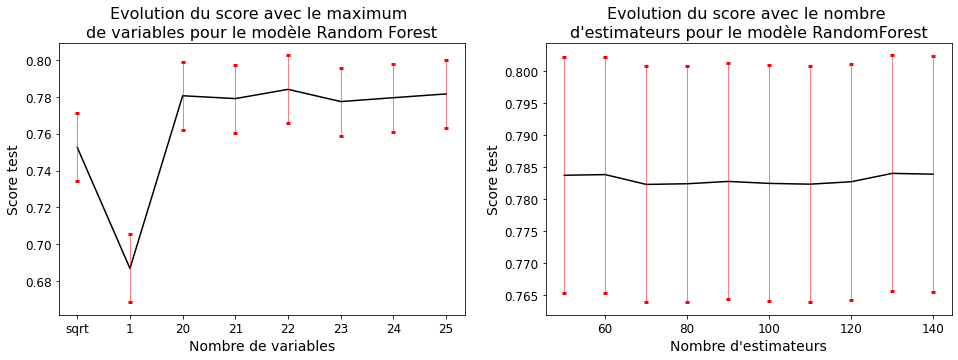

In [133]:
plt.figure(figsize=(16,5))

y_r_feat = []
y_err_r_feat = []

plt.subplot(121)
for i in range (0,80,10):
    max_score = grid_random_forest_ess.cv_results_["mean_test_score"][i:i+10:].max()
    ind_max_score = np.argmax(max_score)
    y_r_feat.append(max_score)
    y_err_r_feat.append(grid_random_forest_ess.cv_results_["std_test_score"][ind_max_score])

plt.plot(["sqrt", "1", "20", "21", "22", "23", "24", "25"], y_r_feat, color="black")
plt.errorbar(["sqrt", "1", "20", "21", "22", "23", "24", "25"], y_r_feat, yerr = y_err_r_feat, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)
plt.xlabel("Nombre de variables", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le maximum \nde variables pour le modèle Random Forest", fontsize = 16)


plt.subplot(122)

y_r_estim = []
y_err_r_estim = []

for i in range (0,10,1):
    max_score = grid_random_forest_ess.cv_results_["mean_test_score"][i::10].max()
    ind_max_score = np.argmax(max_score)
    y_r_estim.append(max_score)
    y_err_r_estim.append(grid_random_forest_ess.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_r_estim, color="black")
plt.errorbar(n_estimators, y_r_estim, yerr = y_err_r_estim, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle RandomForest", fontsize = 16)
plt.show()

In [134]:
r2_comparatif_train_ess.append(r2_grid_randomF_train_ess)
r2_comparatif_test_ess.append(r2_grid_randomF_test_ess)

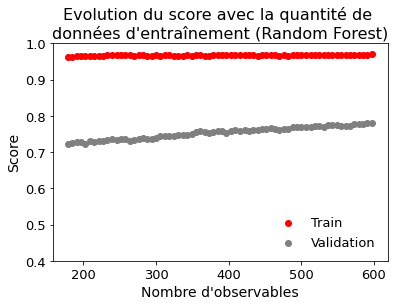

In [135]:
N, train_score, val_score = learning_curve(RandomForestRegressor(max_features=22, n_estimators=130), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité de \ndonnées d'entraînement (Random Forest)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

Nous voyons que le coefficient de corrélation est légérement meilleur lorsque nous incorporons l'ENERGYSTARScore (0.68 à 0.75). En revanche, que ce soit pour l'ElasticNet ou le RandomForest, le coefficient de corrélation reste très similaire.

Nous pouvons observer qu'il faut un plus grand nombre de variables à considérer (22 avec l'ENERGYSTARScore et 7 sans le considérer) pour maximiser le coefficient de corrélation et quasiment le même nombre d'estimateurs (130 contre 140).

Nous retrouvons toujours les mêmes tendances lorsque nous traçons la courbe d'apprentissage, i.e. il y a toujours du surapprentissage.

Nous allons regarder le modèle AdaBoost.
<a class="anchor" id="section_3_2_2"></a>
### Régression Ada Boost

In [136]:
n_ada = 10
n_estimators = np.arange(10,130,n_ada)
learning_rate = np.logspace(-2,0.2,20)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate" : learning_rate}

grid_ada_ess = GridSearchCV(AdaBoostRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_ada_ess.fit(X_train_ess, y_train_ess)

print(f"Le meilleur paramètre est : {grid_ada_ess.best_params_}.")
print(f"Le meilleur score moyen est : {grid_ada_ess.best_score_.round(5)}.")

r2_grid_ada_ess_train = grid_ada_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_ada_ess_train,5)}.")

r2_grid_ada_ess_test = grid_ada_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_ada_ess_test,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.32008340465997676, 'n_estimators': 110}.
Le meilleur score moyen est : 0.73061.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.79932.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.66722.


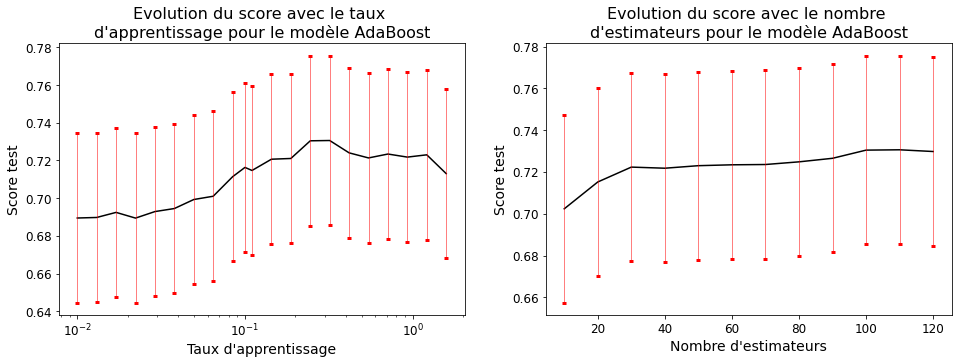

In [137]:
y_ada_learn = []
y_err_ada_learn = []

for i in range (0,252,12):
    max_score = grid_ada_ess.cv_results_["mean_test_score"][i:i+12:].max()
    ind_max_score = np.argmax(max_score)
    y_ada_learn.append(max_score)
    y_err_ada_learn.append(grid_ada_ess.cv_results_["std_test_score"][ind_max_score])
    
plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(learning_rate, y_ada_learn, color="black")
plt.errorbar(learning_rate, y_ada_learn, yerr = y_err_ada_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le taux \nd'apprentissage pour le modèle AdaBoost", fontsize = 16)

plt.subplot(122)

y_ada_esti = []
y_err_ada_esti = []
for i in range (0,12,1):
    max_score = grid_ada_ess.cv_results_["mean_test_score"][i::12].max()
    ind_max_score = np.argmax(max_score)
    y_ada_esti.append(max_score)
    y_err_ada_esti.append(grid_ada_ess.cv_results_["std_test_score"][ind_max_score])

plt.plot(n_estimators, y_ada_esti, color="black")
plt.errorbar(n_estimators, y_ada_esti, yerr = y_err_ada_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#plt.xlim(0.01,1)
plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle AdaBoost", fontsize = 16)

plt.show()

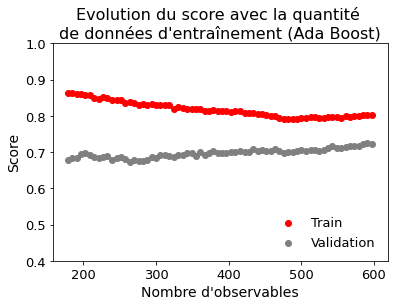

In [138]:
N, train_score, val_score = learning_curve(AdaBoostRegressor(learning_rate = 0.32008, n_estimators = 110), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité \nde données d'entraînement (Ada Boost)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

In [139]:
r2_comparatif_train_ess.append(r2_grid_ada_ess_train)
r2_comparatif_test_ess.append(r2_grid_ada_ess_test)

En utilisant le modèle AdaBoost, nous remarquons que le coefficient de corrélation reste similaire avec ou sans l'ENERGYSTARScore. 
De plus, le score varie peu avec un taux d'apprentissage compris entre 10<sup>-2</sup> et 1 mais le score diminue pour un taux d'apprentisage supérieur à 1. En revanche, il y a peu de variation du score moyen avec le nombre d'estimateurs.
Enfin, le modèle AdaBoost ne fait pas de surapprentissage.

Nous allons étudier le modèle Gradient Boosting en faisant varier le nombre d'estimateur et le taux d'apprentissage. 
<a class="anchor" id="section_3_2_3"></a>
### Régression Gradient Boosting

In [140]:
n_grad = 10
n_estimators = np.arange(70,130,n_grad)
learning_rate = np.logspace(-2,0,15)
learning_rate = sorted(np.append(learning_rate, [0.1]))
param_grid = {"n_estimators" : n_estimators, "learning_rate": learning_rate}

grid_grad_ess = GridSearchCV(GradientBoostingRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_grad_ess.fit(X_train_ess, y_train_ess)

print(f"Le meilleur paramètre est : {grid_grad_ess.best_params_}.")
print(f"Le meilleur score moyen est : {grid_grad_ess.best_score_.round(5)}.")

r2_grid_grad_train_ess = grid_grad_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_grad_train_ess,5)}.")

r2_grid_grad_test_ess = grid_grad_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_grad_test_ess,5)}.")

Le meilleur paramètre est : {'learning_rate': 0.1, 'n_estimators': 110}.
Le meilleur score moyen est : 0.78355.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.91757.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.76419.


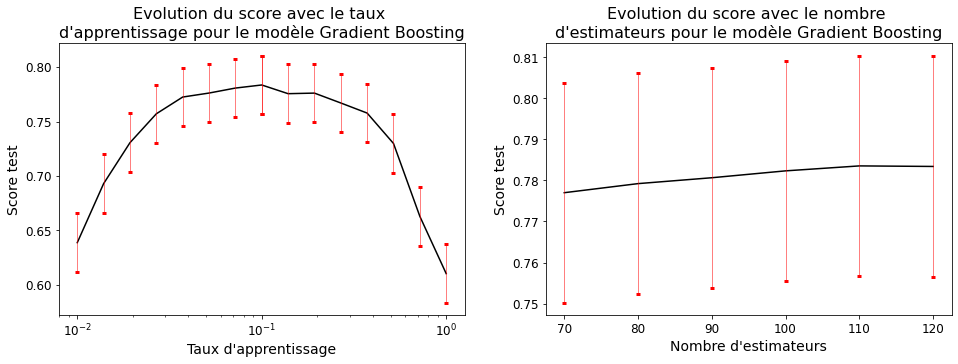

In [141]:
y_grad_learn = []
y_err_grad_learn = []

for i in range (0,96,6):
    max_score = grid_grad_ess.cv_results_["mean_test_score"][i:i+6:].max()
    ind_max_score = np.argmax(max_score)
    y_grad_learn.append(max_score)
    y_err_grad_learn.append(grid_grad_ess.cv_results_["std_test_score"][ind_max_score])

plt.figure(figsize=(16,5))

plt.subplot(121)

plt.plot(learning_rate, y_grad_learn, color="black")
plt.errorbar(learning_rate, y_grad_learn, yerr = y_err_grad_learn, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel("Taux d'apprentissage", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le taux \nd'apprentissage pour le modèle Gradient Boosting", fontsize = 16)

plt.subplot(122)

y_grad_esti = []
y_err_grad_esti = []
for i in range (0,6,1):
    max_score = grid_grad_ess.cv_results_["mean_test_score"][i::6].max()
    ind_max_score = np.argmax(max_score)
    y_grad_esti.append(max_score)
    y_err_grad_esti.append(grid_grad_ess.cv_results_["std_test_score"][ind_max_score])
    
plt.plot(n_estimators, y_grad_esti, color="black")
plt.errorbar(n_estimators, y_grad_esti, yerr = y_err_grad_esti, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xlabel("Nombre d'estimateurs", fontsize = 14)
plt.ylabel("Score test", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title("Evolution du score avec le nombre \nd'estimateurs pour le modèle Gradient Boosting", fontsize = 16)
plt.show()

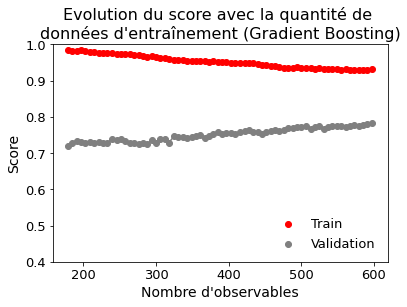

In [142]:
N, train_score, val_score = learning_curve(GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 110), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité de \ndonnées d'entraînement (Gradient Boosting)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

In [143]:
r2_comparatif_train_ess.append(r2_grid_grad_train_ess)
r2_comparatif_test_ess.append(r2_grid_grad_test_ess)

Le fait d'utiliser le modèle Gradient Boosting permet d'obtenir un coefficent de corrélation de 0.764, ce qui est supérieur à celui obtenu sans considérer l'ENERGYSTARScore (0.677). 

Nous observons aussi une variation du score test moyen avec le taux d'apprentissage. Cependant, il y a très peu de variation du score test moyen avec le nombre d'estimateurs.

Globalement, l'ENERGYSTARScore a un impact sur les méthodes ensemblistes.
Nous allons poursuivre notré étude avec le modèle KNN.
<a class="anchor" id="section_3_3"></a>
## Régression KNN

In [144]:
param_grid = {'n_neighbors': voisins,  "metric":["l1","l2"]}
grid_knn_ess = model_selection.GridSearchCV(KNeighborsRegressor(),
                                        param_grid,
                                        cv=5, 
                                        scoring="r2")
grid_knn_ess.fit(X_train_ess, y_train_ess)

print(f"Le meilleur paramètre est : {grid_knn_ess.best_params_}.")
print(f"Le meilleur score moyen est : {grid_knn_ess.best_score_.round(5)}.")

r2_grid_knn_train_ess = grid_knn_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_knn_train_ess,5)}.")

r2_grid_knn_test_ess = grid_knn_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_knn_test_ess,5)}.")

Le meilleur paramètre est : {'metric': 'l1', 'n_neighbors': 4}.
Le meilleur score moyen est : 0.61908.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.78612.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.64851.


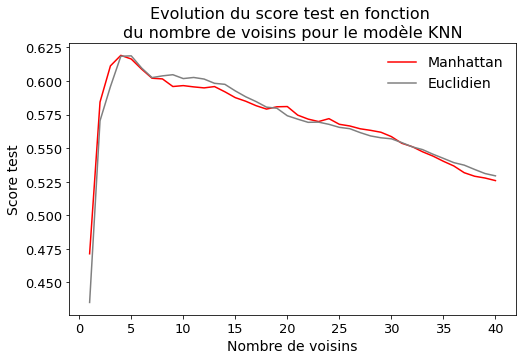

In [145]:
y_1 = grid_knn_ess.cv_results_["mean_test_score"][0:40]
y_2 = grid_knn_ess.cv_results_["mean_test_score"][40:]
y_err_1 = grid_knn_ess.cv_results_["std_test_score"][0:40]
y_err_2 = grid_knn_ess.cv_results_["std_test_score"][40:]

plt.figure(figsize=(8,5))

plt.plot(voisins, y_1, label="Manhattan", color="red")
plt.plot(voisins, y_2, label="Euclidien", color="gray")


plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Evolution du score test en fonction \ndu nombre de voisins pour le modèle KNN", fontsize=16)

plt.legend(frameon=False, bbox_to_anchor=(1,1), fontsize=14)

plt.show()

In [146]:
r2_comparatif_train_ess.append(r2_grid_knn_train_ess)
r2_comparatif_test_ess.append(r2_grid_knn_test_ess)

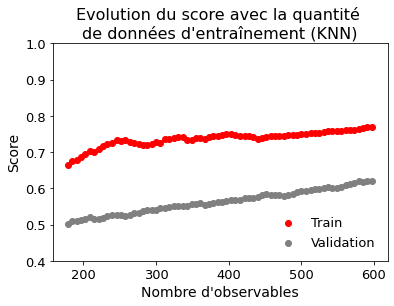

In [147]:
N, train_score, val_score = learning_curve(KNeighborsRegressor(metric = "l1", n_neighbors = 4), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité \nde données d'entraînement (KNN)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

Le coefficient de corrélation est de 0.65 avec le modèle KNN en considérant l'ENERGYSTARScore, ce qui est supérieur à celui obtenu dans la partie précédente (0.54). Le coefficient de corrélation est toujours inférieur à celui obtenu avec les méthodes ensemblistes et l'ElasticNet.

Nous observons un comportement du score moyen identique selon la métrique. 
Pour ces deux métriques, le score moyen augmente entre 1 et 4 voisins, puis diminue avec le nombre de voisins.

Nous allons enfin regarder ce que donne la régression SVR.
<a class="anchor" id="section_3_4"></a>
## Régression SVR

In [148]:
epsilon = np.logspace(-1.5,0.5,50)
kernel = ["rbf"]
c = np.logspace(-2,1,20)
c = sorted(np.append(c, [1]))
epsilon = sorted(np.append(epsilon, [0.1]))
param_grid = {'epsilon': epsilon, "kernel" : kernel, "C": c}
grid_svr_ess = model_selection.GridSearchCV(SVR(degree=2),
                                            param_grid,
                                            cv=5, scoring="r2")

grid_svr_ess.fit(X_train_ess, y_train_ess)

print(f"Le meilleur score est de : {grid_svr_ess.best_score_.round(5)}.")
print(f"Les meilleurs paramètres sont : {grid_svr_ess.best_params_}")

r2_grid_svr_train_ess = grid_svr_ess.score(X_train_ess, y_train_ess)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_svr_train_ess,5)}.")

r2_grid_svr_test_ess = grid_svr_ess.score(X_test_ess, y_test_ess)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_svr_test_ess,5)}.")

Le meilleur score est de : 0.78643.
Les meilleurs paramètres sont : {'C': 1.623776739188721, 'epsilon': 0.03473892112083116, 'kernel': 'rbf'}
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.88726.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.79883.


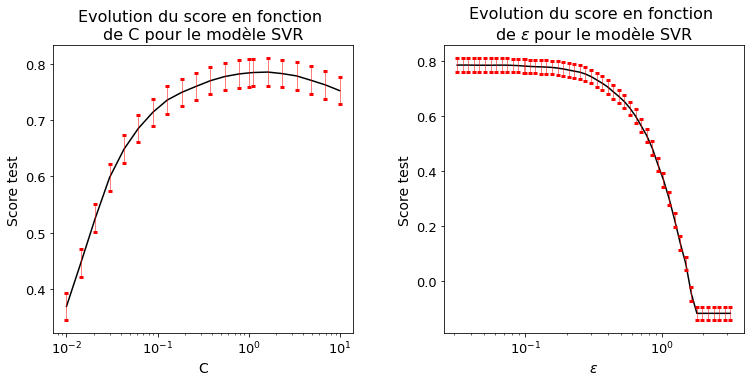

In [149]:
y_svr_ess_C = []
y_err_svr_ess_C = []
for i in range (0,1071,51):
    max_score = grid_svr_ess.cv_results_["mean_test_score"][i:i+51].max()
    ind_max_score = np.argmax(max_score)
    y_svr_ess_C.append(max_score)
    y_err_svr_ess_C.append(grid_svr_ess.cv_results_["std_test_score"][ind_max_score])

plt.figure(figsize=(12,5))    

plt.subplot(121)

plt.plot(c, y_svr_ess_C, label = "rbf", color="black")
plt.errorbar(c, y_svr_ess_C, yerr = y_err_svr_ess_C, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel("C", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde C pour le modèle SVR", fontsize=16)

plt.subplot(122)

y_svr_ess_eps = []
y_err_svr_ess_eps = []
for i in range (0,51,1):
    max_score = grid_svr_ess.cv_results_["mean_test_score"][i::51].max()
    ind_max_score = np.argmax(max_score)
    y_svr_ess_eps.append(max_score)
    y_err_svr_ess_eps.append(grid_svr_ess.cv_results_["std_test_score"][ind_max_score])

plt.subplot(122)

plt.plot(epsilon, y_svr_ess_eps, label = "rbf", color="black")
plt.errorbar(epsilon, y_svr_ess_eps, yerr = y_err_svr_ess_eps, 
             fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.xscale("log")

plt.xlabel(r"$\epsilon$", fontsize=14)
plt.ylabel("Score test", fontsize=14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Evolution du score en fonction \nde" r" $\epsilon$ pour le modèle SVR", fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.0)

plt.show()

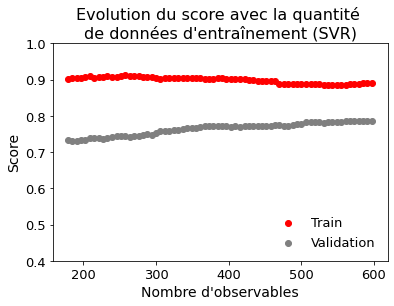

In [150]:
N, train_score, val_score = learning_curve(SVR(C = 1.6238, epsilon = 0.03474, kernel = "rbf"), X_train_ess, y_train_ess,
                                           train_sizes=np.linspace(0.3,1,70), random_state=rs, cv=5)

plt.scatter(N, train_score.mean(axis=1), label="Train", color = "red")
plt.plot(N, train_score.mean(axis=1), color = "red")

plt.scatter(N, val_score.mean(axis=1), label="Validation", color="gray")
plt.plot(N, val_score.mean(axis=1), color="gray")

plt.xlabel("Nombre d'observables", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0.4,1)

plt.title("Evolution du score avec la quantité \nde données d'entraînement (SVR)", fontsize=16)

plt.legend(frameon=False, loc=4, fontsize = 13)

plt.show()

In [151]:
r2_comparatif_train_ess.append(r2_grid_svr_train_ess)
r2_comparatif_test_ess.append(r2_grid_svr_test_ess)

Le modèle SVR permet (avec des hyperparamètres optimisés) d'avoir un coefficient de corrélation de 0.799, ce qui est le meilleur coefficient de corrélation obtenu jusqu'à présent. 

En revanche, le coefficient de corrélation est ici bien meilleur lorsque nous considérons l'ENERGYSTARScore (0.799 contre 0.606). Nous voyons qu'il y a un impact de l'ENERGYSTARScore sur le coefficient de corrélation. 

Nous allons conclure cette étude en faisant un bilan de l'ensemble des résultats obtenus.
<a class="anchor" id="section_3_5"></a>
## Bilan
<a class="anchor" id="section_3_5_1"></a>
### Bilan ENERGYSTARScore

Nous allons comparer les scores obtenus avec les différents modèles lorsque nous incorporons l'ENERGYSTARScore.

Ensuite, nous allons faire un bilan de l'ensemble de l'étude en comparant les coefficients de corrélations pour chaque modèle en considérant les variables numériques, les variables numériques et catégorielles, l'ensemble des variables et l'ENERGYSTARScore.

In [152]:
erreur_1 = np.argmax(grid_elastic_net_ess.cv_results_["mean_test_score"])
err_e_n_g = (grid_elastic_net_ess.cv_results_["std_test_score"][erreur_1])

erreur_2 = np.argmax(grid_random_forest_ess.cv_results_["mean_test_score"])
err_r_f_g = (grid_random_forest_ess.cv_results_["std_test_score"][erreur_2])

erreur_3 = np.argmax(grid_ada_ess.cv_results_["mean_test_score"])
err_ada_g = (grid_ada_ess.cv_results_["std_test_score"][erreur_3])

erreur_4 = np.argmax(grid_grad_ess.cv_results_["mean_test_score"])
err_grad_g = (grid_grad_ess.cv_results_["std_test_score"][erreur_4])

erreur_5 = np.argmax(grid_knn_ess.cv_results_["mean_test_score"])
err_knn_g = (grid_knn_ess.cv_results_["std_test_score"][erreur_5])

erreur_6 = np.argmax(grid_svr_ess.cv_results_["mean_test_score"])
err_svr_g = (grid_svr_ess.cv_results_["std_test_score"][erreur_6])

err_comp_ess = [0, 0, 0, err_e_n_g, err_r_f_g, err_ada_g, err_grad_g, err_knn_g, err_svr_g]

modele = ["Dummy", "Linéaire", "Poly (2)", "ElasticN", "RandomF", "AdaBoost", "Gradient", "KNN", "SVR"]

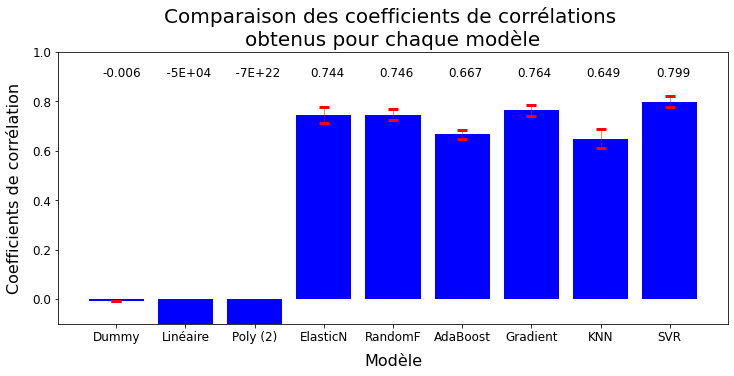

In [153]:
plt.figure(figsize=(12,5))

plt.bar(height = r2_comparatif_test_ess, x = modele, color="blue")
plt.errorbar(modele, r2_comparatif_test_ess, err_comp_ess, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)
for i in range (0, len(r2_comparatif_test_ess),1): 
    if np.abs(r2_test_c[i])<1:
        plt.text(i-0.2, 0.9, f"{round(r2_comparatif_test_ess[i],3)}",fontsize=12)
    else:
        plt.text(i-0.5, 0.9, format(r2_comparatif_test_ess[i], "10.0E"),fontsize=12)

plt.ylim(-0.1,1)

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Coefficients de corrélation", fontsize=16, labelpad = 10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Comparaison des coefficients de corrélations \nobtenus pour chaque modèle", fontsize=20)
plt.show()

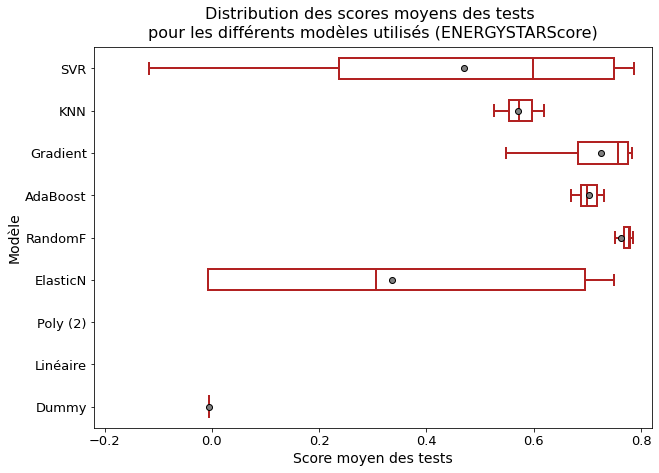

In [154]:
dist_mean_score = []
dist_mean_score.append(r2_dummy_test_ess)
dist_mean_score.append(r2_linear_test_ess)
dist_mean_score.append(r2_poly_test_ess)
dist_mean_score.append(grid_elastic_net_ess.cv_results_["mean_test_score"])
dist_mean_score.append(grid_random_forest_ess.cv_results_["mean_test_score"])
dist_mean_score.append(grid_ada_ess.cv_results_["mean_test_score"])
dist_mean_score.append(grid_grad_ess.cv_results_["mean_test_score"])
dist_mean_score.append(grid_knn_ess.cv_results_["mean_test_score"] )
dist_mean_score.append(grid_svr_ess.cv_results_["mean_test_score"])

plt.figure(figsize=(10,7))

plt.boxplot(dist_mean_score, vert=False, showfliers=False, patch_artist=True, 
            capprops=dict(color="firebrick", linewidth=2),
            boxprops=dict(facecolor="white", color="firebrick", linewidth=2),
            whiskerprops=dict(color="firebrick", linewidth=2),
            medianprops=dict(color="firebrick", linewidth=2),
            showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'gray'})
plt.xlim(-0.22,0.82)

plt.xlabel("Score moyen des tests", fontsize=14)
plt.ylabel("Modèle", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(np.arange(1,10), modele, fontsize=13)

plt.title("Distribution des scores moyens des tests \npour les différents modèles utilisés (ENERGYSTARScore)", fontsize=16, pad=10)
plt.show()


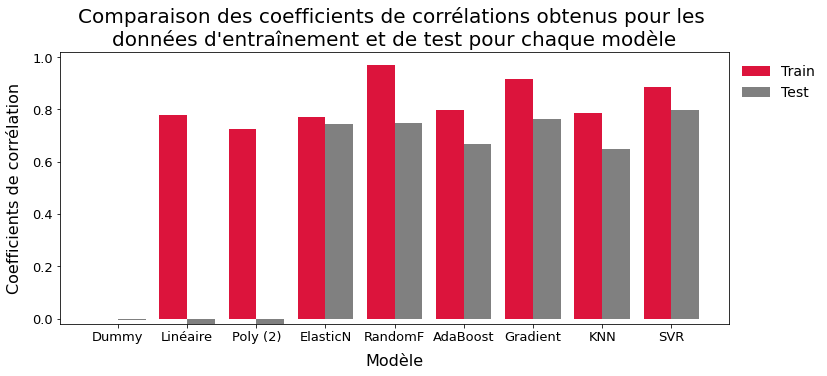

In [155]:
plt.figure(figsize=(12,5))

x_axis = np.arange(len(modele))
plt.bar(height = r2_comparatif_train_ess, x = x_axis-0.2, width=0.4, color = "crimson", label="Train")
plt.bar(height = r2_comparatif_test_ess, x = x_axis+0.2, width=0.4, color = "gray", label="Test")

plt.ylim(-0.02,1.02)

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Coefficients de corrélation", fontsize=16, labelpad = 10)

plt.xticks(x_axis, modele, fontsize=13)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=13)
plt.legend(bbox_to_anchor =(1,1), frameon=False, fontsize=14)

plt.title("Comparaison des coefficients de corrélations obtenus pour les \ndonnées d'entraînement et de test pour chaque modèle", 
          fontsize=20)
plt.show()

In [156]:
time_elastic_net = grid_elastic_net.cv_results_["mean_fit_time"].mean()
time_elastic_net_c = grid_elastic_c.cv_results_["mean_fit_time"].mean()
time_elastic_net_ess = grid_elastic_net_ess.cv_results_["mean_fit_time"].mean()

time_random_f = grid_random_forest.cv_results_["mean_fit_time"].mean()
time_random_f_c = grid_random_forest_c.cv_results_["mean_fit_time"].mean()
time_random_f_ess = grid_random_forest_ess.cv_results_["mean_fit_time"].mean()

time_ada = grid_ada.cv_results_["mean_fit_time"].mean()
time_ada_c = grid_ada_c.cv_results_["mean_fit_time"].mean()
time_ada_ess = grid_ada_ess.cv_results_["mean_fit_time"].mean()

time_grad_b = grid_grad.cv_results_["mean_fit_time"].mean()
time_grad_b_c = grid_grad_c.cv_results_["mean_fit_time"].mean()
time_grad_b_ess = grid_grad_ess.cv_results_["mean_fit_time"].mean()

time_knn = grid_knn.cv_results_["mean_fit_time"].mean()
time_knn_c = grid_knn_c.cv_results_["mean_fit_time"].mean()
time_knn_ess = grid_knn_ess.cv_results_["mean_fit_time"].mean()

time_svr = grid_svr.cv_results_["mean_fit_time"].mean()
time_svr_c = grid_svr_c.cv_results_["mean_fit_time"].mean()
time_svr_ess = grid_svr_ess.cv_results_["mean_fit_time"].mean()

time_num = [time_elastic_net, time_random_f, time_ada, time_grad_b, time_knn, time_svr]
time_cat = [time_elastic_net_c, time_random_f_c, time_ada_c, time_grad_b_c, time_knn_c, time_svr_c]
time_ess = [time_elastic_net_ess, time_random_f_ess, time_ada_ess, time_grad_b_ess, time_knn_ess, 
            time_svr_ess]

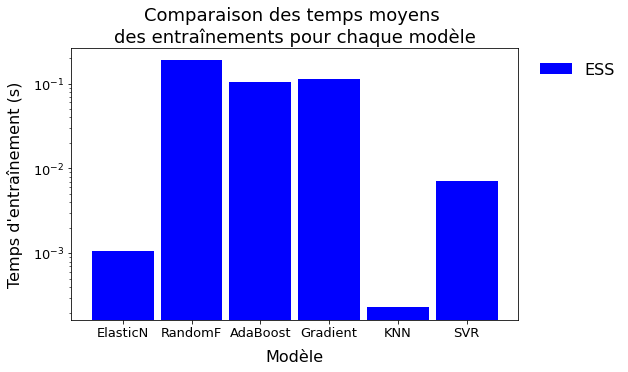

In [157]:
plt.figure(figsize=(8,5))

x_axis = np.arange(len(modele[3:]))

plt.bar(height = time_ess, x = x_axis, width=0.9, color="blue", label="ESS")

plt.yscale("log")

plt.xlabel("Modèle", fontsize=16, labelpad = 10)
plt.ylabel("Temps d'entraînement (s)", fontsize=16, labelpad = 10)

plt.xticks(x_axis, modele[3:], fontsize=13)
plt.yticks(fontsize=13)

plt.title("Comparaison des temps moyens \ndes entraînements pour chaque modèle", fontsize=18)

plt.legend(bbox_to_anchor = (1.25,1), frameon=False, fontsize=16)

plt.show()

Parmi les modèles donnant le meilleur coefficient de corrélation, nous retrouvons les modèles SVR, Gradient Boosting, RandomForest et ElasticNet qui ont des coefficient de corrélation compris entre 0.74 et 0.8. Les modèles AdaBoost et KNN ont des coefficient de corrélation d'environ 0.66, ce qui est proche des coefficients de corrélation des autres modèles.

En revanche, le modèle RandomForest est celui ayant la plus faible dispersion des scores moyens des tests. Nous retrouvons ensuite le modèle AdaBoost, le modèle KNN et le modèle Gradient Boosting.

Enfin, le modèle ElasticNet semble être le modèle qui ne surapprend pascomparé aux autres modèles. Cela s'explique par le fait qu'il n'y a pas assez de données pour que les autres modèles convergent vers un score moyen stable. Ce phénomène était moins observé dans les parties précédentes car il y avait environ 30% de données supplémentaires.  

Nous pouvons aussi remarquer que les modèles ensemblistes nécessitent plus de temps de calculs en moyenne que les autres modèles.

Si nous devions sélectionner un modèle pour prédire la consommation d'énergie des bâtiments, nous choisirions le modèle Random Forest car le coefficient de corrélation reste très élevé et il y a une faible dispersion des scores moyens, même si c'est un modèle qui surapprend fortement.

Nous allons maintenant comparer les différents coefficients de corrélation obtenus durant cette étude.
<a class="anchor" id="section_3_5_2"></a>
### Bilan de l'étude

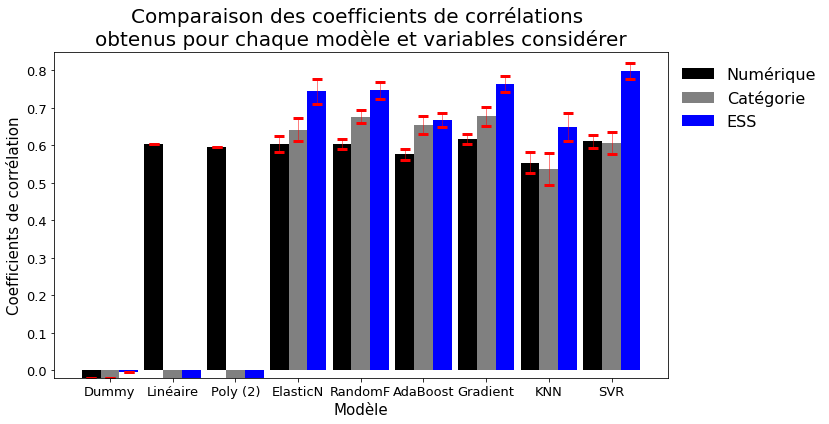

In [158]:
plt.figure(figsize=(11,6))

x_axis = np.arange(len(modele))

plt.bar(height = r2_comparatif_test, x = x_axis-0.3, width=0.3, color="black", label="Numérique")
plt.errorbar(x_axis-0.3, r2_comparatif_test, err_comp, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.bar(height = r2_comparatif_test_c, x = x_axis, width=0.3, color="gray", label="Catégorie")
plt.errorbar(x_axis, r2_comparatif_test_c, err_comp_c, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.bar(height = r2_comparatif_test_ess, x = x_axis+0.3, width=0.3, color="blue", label="ESS")
plt.errorbar(x_axis+0.3, r2_comparatif_test_ess, err_comp_ess, fmt = 'none', capsize = 5, 
             ecolor = 'red', elinewidth = 0.5, capthick = 3)

plt.ylim(-0.02,0.85)

plt.xticks(x_axis, modele, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel("Modèle", fontsize=15)
plt.ylabel("Coefficients de corrélation", fontsize=15)

plt.title("Comparaison des coefficients de corrélations \nobtenus pour chaque modèle et variables considérer", fontsize=20)

plt.legend(bbox_to_anchor = (1,1), frameon=False, fontsize=16)

plt.show()

Comme le montre le graphique ci-haut, le fait d'ajouter des variables catégorielles apporte peu aux coefficient de corrélation, qui oscille entre 0.6 et 0.7 pour la plupart des méthodes et avec ou sans les variables catégorielles (en écartant les modèles linéaires et polynomiales qui donnent des coefficients de corrélation très éloignés de 0).

Cette augmentation du coefficient de corrélation se fait plutôt ressentir lorsque l'ENERGYSTARScore est ajouté aux autres variables, même si la différence se voit peu pour le modèle AdaBoost.

En ne considérant que le meilleur modèle, en l'occurence le modèle Random Forest, l'ENERGYSTARScore semble être une variable impactante car le coefficient de corrélation augmente.

D'un point de vue globale, i.e. en considérant l'ensemble des modèles, l'ENERGYSTARScore a un impact sur les coefficients de corrélation.

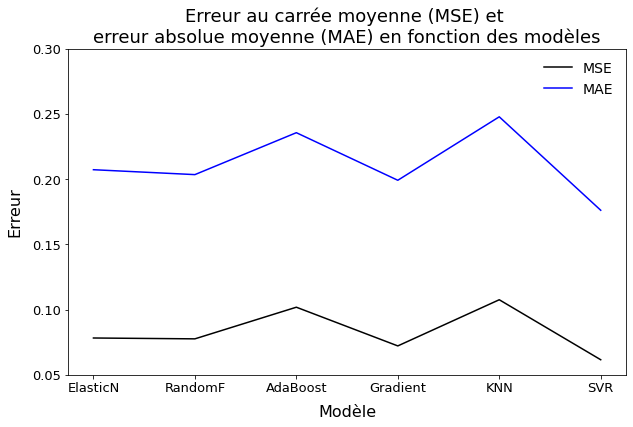

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_elastic_ess = mean_squared_error(y_test_ess, grid_elastic_net_ess.predict(X_test_ess))
mse_random_ess = mean_squared_error(y_test_ess, grid_random_forest_ess.predict(X_test_ess))
mse_ada_ess = mean_squared_error(y_test_ess, grid_ada_ess.predict(X_test_ess))
mse_gradient_ess = mean_squared_error(y_test_ess, grid_grad_ess.predict(X_test_ess))
mse_knn_ess = mean_squared_error(y_test_ess, grid_knn_ess.predict(X_test_ess))
mse_svr_ess = mean_squared_error(y_test_ess, grid_svr_ess.predict(X_test_ess))

mae_elastic_ess = mean_absolute_error(y_test_ess, grid_elastic_net_ess.predict(X_test_ess))
mae_random_ess = mean_absolute_error(y_test_ess, grid_random_forest_ess.predict(X_test_ess))
mae_ada_ess = mean_absolute_error(y_test_ess, grid_ada_ess.predict(X_test_ess))
mae_gradient_ess = mean_absolute_error(y_test_ess, grid_grad_ess.predict(X_test_ess))
mae_knn_ess = mean_absolute_error(y_test_ess, grid_knn_ess.predict(X_test_ess))
mae_svr_ess = mean_absolute_error(y_test_ess, grid_svr_ess.predict(X_test_ess))

mse_energie = [mse_elastic_ess, mse_random_ess, mse_ada_ess, mse_gradient_ess, mse_knn_ess, mse_svr_ess]

mae_energie = [mae_elastic_ess, mae_random_ess, mae_ada_ess, mae_gradient_ess, mae_knn_ess, mae_svr_ess]

plt.figure(figsize=(10,6))
plt.plot(mse_energie, label="MSE", color="black")
plt.plot(mae_energie, label="MAE",color="blue")

plt.xticks([0,1,2,3,4,5], modele[3:], fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel("Modèle", fontsize=16, labelpad=10)
plt.ylabel("Erreur", fontsize=16, labelpad=10)

plt.ylim(0.05,0.300)

plt.title("Erreur au carrée moyenne (MSE) et \nerreur absolue moyenne (MAE) en fonction des modèles", fontsize=18)

plt.legend(frameon=False, loc=1, fontsize=14)
plt.show()

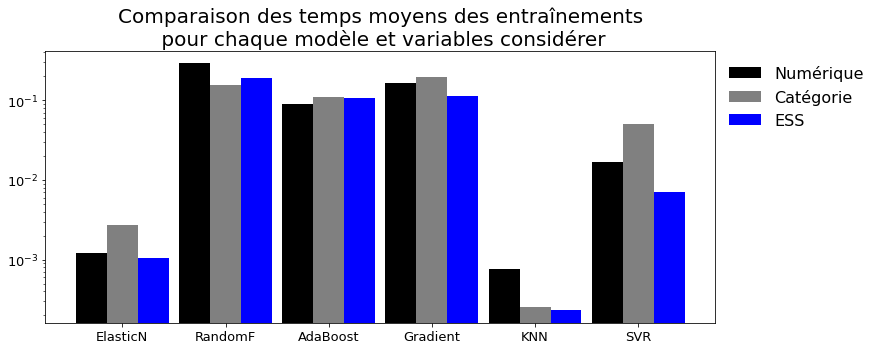

In [160]:
plt.figure(figsize=(12,5))

x_axis = np.arange(len(modele[3:]))

plt.bar(height = time_num, x = x_axis-0.3, width=0.3, color="black", label="Numérique")

plt.bar(height = time_cat, x = x_axis, width=0.3, color="gray", label="Catégorie")

plt.bar(height = time_ess, x = x_axis+0.3, width=0.3, color="blue", label="ESS")

plt.yscale("log")

plt.xticks(x_axis, modele[3:], fontsize=13)
plt.yticks(fontsize=13)

plt.title("Comparaison des temps moyens des entraînements\n pour chaque modèle et variables considérer", fontsize=20)

plt.legend(bbox_to_anchor = (1,1), frameon=False, fontsize=16)

plt.show()

Si nous regardons le temps moyen nécessaire pour l'entraînement des données pour chaque modèle et pour chaque variable considérée (numérique, numérique et catégorielles, numérique et catégorielles et ENERGYSTARScore), nous pouvons voir que le fait d'ajouter des variables catégorielles augmente le temps de calcul pour es modèles SVR et ElasticNet mais pas pour les modèles ensemblistes et KNN.

De plus, ajouter l'ENERGYSTARScore améliore légérement les temps moyens de calculs.

Nous allons terminer cette étude en comparant les valeurs de la consommation d'énergie des bâtiments que nous avons à notre disposition aux valeurs prédites.
<a class="anchor" id="section_3_5_3"></a>
### Prediction de la consommation d'énergie des bâtiments

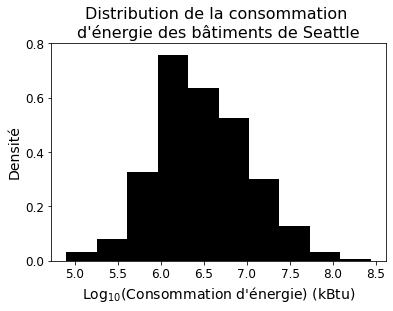

In [161]:
plt.hist(data_ESS["Energie"], density=True, color="black")

plt.xlabel(r"$\rmLog_{\rm 10}$(Consommation d'énergie) (kBtu)", fontsize=14)
plt.ylabel("Densité", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks([0,0.2,0.4,0.6,0.8], fontsize=12)

plt.ylim(0,0.8)
plt.title("Distribution de la consommation \nd'énergie des bâtiments de Seattle", fontsize=16)
plt.show()

Lorsque nous traçons la distribution de la consommation d'énergie, nous pouvons voir qu'il y a une distribution normale des données. Nous allons faire 3 groupes de bâtiment choisis en fonction de leur consommation d'énergie
- les bons bâtiments où log<sub>10</sub>(Energie) inférieur ou égal à 6 kBtu,
- les bâtiments moyens où log<sub>10</sub>(Energie) est compris entre 6 kBtu et 7 kBtu,  
- les mauvais bâtiments où log<sub>10</sub>(Energie) est supérieur à 7 kBtu.

Ensuite nous allons prédire la consommation d'énergie des bâtiments en nous basant sur le modèle Random Forest puis nous ferons une matrice de confusion pour savoir si la prédiction est bonne ou non.

In [162]:
data_prediction = data_ESS.copy()
data_prediction.loc[:,"rang_Energie"] = np.nan
data_prediction.loc[(data_prediction["Energie"]<=6),"rang_Energie"] = "Bon"
data_prediction.loc[(data_prediction["Energie"]<=7) & (data_prediction["Energie"]>6),"rang_Energie"] = "Moyen"
data_prediction.loc[(data_prediction["Energie"]>7),"rang_Energie"] = "Mauvais"

data_prediction.loc[:,"predict_Energie"] = np.nan
X_ = []
X_ = X_ess
X_[:,22:] = rob_scale.fit_transform(X_[:,22:])

data_prediction["predict_Energie"] = grid_random_forest_ess.predict(X_)

data_prediction["rang_predict_Energie"] = np.nan

data_prediction.loc[(data_prediction["predict_Energie"]<=6),"rang_predict_Energie"] = "Bon"
data_prediction.loc[(data_prediction["predict_Energie"]<=7) & (data_prediction["predict_Energie"]>6),"rang_predict_Energie"] = "Moyen"
data_prediction.loc[(data_prediction["predict_Energie"]>7),"rang_predict_Energie"] = "Mauvais"

display(data_prediction["rang_predict_Energie"].value_counts().sort_index())

Bon        137
Mauvais    158
Moyen      774
Name: rang_predict_Energie, dtype: int64

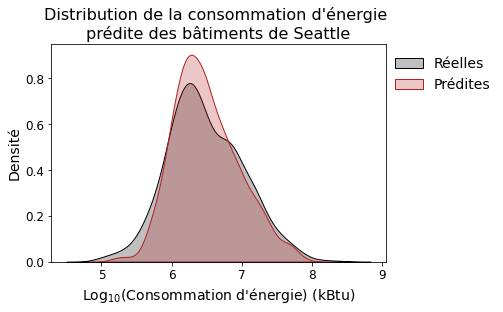

In [163]:
sns.kdeplot(data_prediction["Energie"], shade=True, color="black", label="Réelles")
sns.kdeplot(data_prediction["predict_Energie"], shade=True, color="firebrick", label="Prédites")

plt.xlabel(r"$\rmLog_{\rm 10}$(Consommation d'énergie) (kBtu)", fontsize=14)
plt.ylabel("Densité", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=False, bbox_to_anchor=(1.35,1), fontsize=14)
plt.title("Distribution de la consommation d'énergie \nprédite des bâtiments de Seattle", fontsize=16)

plt.show()

Modelisé,Bon,Mauvais,Moyen,All
Données,,,,
Bon,66.0,0.0,34.0,188
Mauvais,0.0,81.5,18.5,184
Moyen,1.9,1.1,97.0,697
All,12.8,14.8,72.4,1069


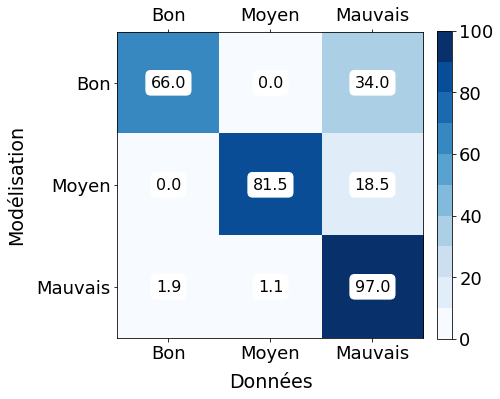

In [164]:
confusion_matrix = pd.crosstab(data_prediction["rang_Energie"], data_prediction["rang_predict_Energie"], 
                               rownames=['Données'], colnames=['Modelisé'], margins=True)


confusion_matrix["Bon"] = confusion_matrix["Bon"]*100/confusion_matrix["All"]
confusion_matrix["Moyen"] = confusion_matrix["Moyen"]*100/confusion_matrix["All"]
confusion_matrix["Mauvais"] = confusion_matrix["Mauvais"]*100/confusion_matrix["All"]

display(round(confusion_matrix,1))

plt.figure(figsize=[6,6])
cmap=plt.cm.get_cmap('Blues', 10)
boundaries = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.matshow(confusion_matrix.iloc[:-1,:-1],cmap=cmap, fignum=1,norm=norm)

for (x, y), value in np.ndenumerate(confusion_matrix.iloc[:-1,:-1].T):
    plt.text(x, y, f"{value:.1f}", va="center", ha="center", fontsize=16, 
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='1'))

col = ["Bon", "Moyen", "Mauvais"]

plt.xticks(range(len(col)), col, fontsize=18, rotation=0)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.yticks(range(len(col)), col, fontsize=18)

plt.xlabel("Données", fontsize=19, labelpad=10)
plt.ylabel("Modélisation",fontsize=19, labelpad=10)

plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=18)


plt.show()

En utilisant le modèle Random Forest, nous avons prédit les valeurs de consommation d'énergie des bâtiments. 

En revanche, lorsque nous comparons les résultats prédits à ceux fournis, nous arrivons à prédire à 97 % qu'un mauvais bâtiment est effectivement mauvais.

En revanche, notre modèle n'arrive pas à moins bien prédire les bâtiments bons ou moyens. Globalement, il y a une surévaluation de la consommation d'énergie. Par conséquent, le modèle aura tendance : 
- à prédire, au mieux la catégorie de bâtiment dans laquelle le bâtiment appartient et
- au pire, à attribuer une moins bonne catégorie aux bâtiments.

Ceci reste moins problématique que de prédire qu'un mauvais bâtiment est un bon bâtiment, ce qui, avec notre modèle, se vérifie très peu.

In [168]:
import shap

best_model = RandomForestRegressor(max_features=22, n_estimators=130)
best_model.fit(X_train_ess, y_train_ess)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_ess)

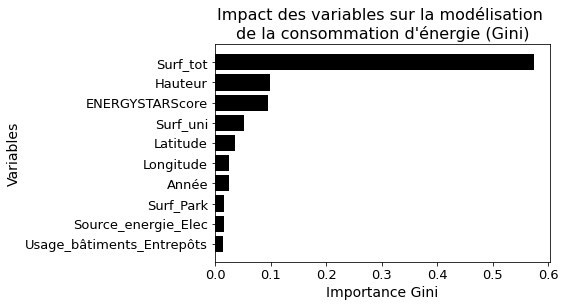

In [206]:
rank_feature = pd.DataFrame(best_model.feature_importances_, data_ESS.iloc[:,:34].columns).reset_index()
rank_feature.columns = ["Feature", "Importance"]
rank_feature = rank_feature.sort_values("Importance", ascending = False)

best_10_features = rank_feature.iloc[:10,:10].sort_values("Importance", ascending = True)

plt.barh(width = best_10_features.iloc[:,1], y = best_10_features.iloc[:,0], color="black")

plt.xlabel("Importance Gini", fontsize = 14)
plt.ylabel("Variables", fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Impact des variables sur la modélisation \nde la consommation d'énergie (Gini)", fontsize=16)

plt.show()

In [209]:
display(shap_values.shape)

(321, 34)

(34,)

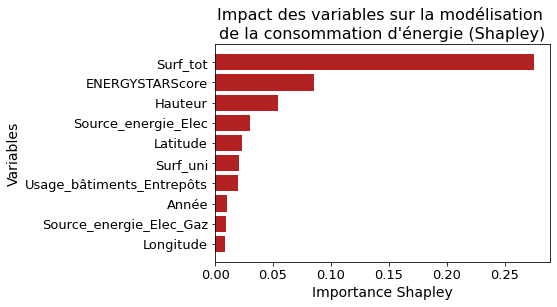

In [223]:
vals= np.abs(shap_values).mean(0)
display(vals.shape)
rank_feature_shapley = pd.DataFrame(list(zip(data_ESS.iloc[:,:34].columns, (vals))), 
                                  columns=["Variable","Importance"])
rank_feature_shapley.sort_values(by=['Importance'], ascending=False,inplace=True)

best_10_features_shapley = rank_feature_shapley.iloc[:10,:10].sort_values("Importance", ascending = True)

plt.barh(width = best_10_features_shapley.iloc[:,1], y = best_10_features_shapley.iloc[:,0], color="firebrick")

plt.xlabel("Importance Shapley", fontsize = 14)
plt.ylabel("Variables", fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Impact des variables sur la modélisation \nde la consommation d'énergie (Shapley)", fontsize=16)

plt.show()

Nous voyons que la surface totale, l'ENERGYSTARScore, la hauteur des bâtiments, la surface unitaire et la latitude des bâtiments sont des variables déterminantes dans la modélisation de la consommation d'énergie en considérant les facteurs Gini ou les facteurs Shapley.

Nous allons nous baser sur les résultats obtenus avec la méthode Shapley pour comparer le coefficient de corrélation obtenus avec les 34 variables ou uniquement les 5 variables les plus pertinentes.

In [234]:
col = rank_feature_shapley.iloc[:5,0].tolist()
data_optimal = data_ESS[col]
display(data_optimal.head())

,Surf_tot,ENERGYSTARScore,Hauteur,Source_energie_Elec,Latitude
0,4.946624,1.778151,0.812913,0.0,47.61220
1,5.015221,1.785330,0.778151,0.0,47.61317
2,5.980508,1.633468,1.322219,0.0,47.61393
3,4.787609,1.748188,0.740363,0.0,47.61412
4,5.244478,1.875061,0.977724,0.0,47.61375


In [235]:
X_opti = data_optimal[data_optimal.columns[:]].values
y_opti = data_ESS["Energie"].values

X_train, X_test, y_train_opti, y_test_opti = model_selection.train_test_split(X_opti, y_opti, test_size=0.3, random_state=rs)

rob_scale = preprocessing.RobustScaler()
X_train_opti = X_train
X_train_opti = rob_scale.fit_transform(X_train_opti)

X_test_opti = X_test
X_test_opti = rob_scale.fit_transform(X_test_opti)

In [237]:
n_random_forest = 10
n_estimators = np.arange(40,120,n_random_forest)
max_features = ["sqrt", 1, 2, 3, 4, 5]
param_grid = {"n_estimators" : n_estimators, "max_features" : max_features}


grid_random_forest_opti = GridSearchCV(RandomForestRegressor(random_state=rs), param_grid, cv=5, scoring="r2")
grid_random_forest_opti.fit(X_train_opti, y_train_opti)

print(f"Le meilleur paramètre est : {grid_random_forest_opti.best_params_}.")
print(f"Le meilleur score moyen est : {grid_random_forest_opti.best_score_.round(5)}.")

r2_grid_randomF_train_opti = grid_random_forest_opti.score(X_train_opti, y_train_opti)
print(f"En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut {round(r2_grid_randomF_train_opti,5)}.")

r2_grid_randomF_test_opti = grid_random_forest_opti.score(X_test_opti, y_test_opti)
print(f"En considérant le jeu de test, le coefficient de corrélation R² vaut {round(r2_grid_randomF_test_opti,5)}.")

Le meilleur paramètre est : {'max_features': 'sqrt', 'n_estimators': 80}.
Le meilleur score moyen est : 0.76481.
En considérant le jeu d'entraînement, le coefficient de corrélation R² vaut 0.96822.
En considérant le jeu de test, le coefficient de corrélation R² vaut 0.70432.


En utilisant les 5 variables ayant les meilleurs facteurs Shapley, nous obtenons un coefficient de corrélation de 0.704. 
Pour rappel, avec l'ensemble des variables, le coefficient de corrélation était de 0.746. 

En considérant les variables pertinentes, le coefficient de corrélation est très proche de celui obtenu avec l'ensemble des variables.

Pour conclure, nous pouvons dire que la surface totale, l'ENERGYSTARScore, la hauteur des bâtiments, la surface unitaire et la latitude des bâtiments suffisent à prédire la consommation d'énergie.